In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
warnings.filterwarnings("ignore") 
%matplotlib inline 
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [ ]:
df_train = pd.read_csv("/content/train.csv")
pd.set_option('display.max_columns', None)

print(df_train)
 
print(df_train.shape)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.00     8450   Pave   NaN      Reg   
1        2          20       RL        80.00     9600   Pave   NaN      Reg   
2        3          60       RL        68.00    11250   Pave   NaN      IR1   
3        4          70       RL        60.00     9550   Pave   NaN      IR1   
4        5          60       RL        84.00    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neig

In [ ]:
print(f"Train set shape: {df_train.shape} \n")

Train set shape: (1460, 81) 



In [ ]:
df_test = pd.read_csv("/content/test.csv")
pd.set_option('display.max_columns', None)

print(df_test)
 
print(df_test.shape)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH        80.00    11622   Pave   NaN      Reg   
1     1462          20       RL        81.00    14267   Pave   NaN      IR1   
2     1463          60       RL        74.00    13830   Pave   NaN      IR1   
3     1464          60       RL        78.00     9978   Pave   NaN      IR1   
4     1465         120       RL        43.00     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM        21.00     1936   Pave   NaN      Reg   
1455  2916         160       RM        21.00     1894   Pave   NaN      Reg   
1456  2917          20       RL       160.00    20000   Pave   NaN      Reg   
1457  2918          85       RL        62.00    10441   Pave   NaN      Reg   
1458  2919          60       RL        74.00     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neig

In [ ]:
print(f"Train set shape: {df_test.shape} \n")

Train set shape: (1459, 80) 



In [ ]:
#dif_1 train
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")
#dif_2 test
dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


cek missing value

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_train.drop(["Id"], axis=1, inplace=True)

Id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [ ]:
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60        65.00     8450            7            5       2003   
1          20        80.00     9600            6            8       1976   
2          60        68.00    11250            7            5       2001   
3          70        60.00     9550            7            5       1915   
4          60        84.00    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003      196.00         706           0        150          856   
1          1976        0.00         978           0        284         1262   
2          2002      162.00         486           0        434          920   
3          1970        0.00         216           0        540          756   
4          2000      350.00         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     2,003.00           2         548           0           61   
1     1,976.00           2         460         298            0   
2     2,001.00           2         608           0           42   
3     1,998.00           3         642           0           35   
4     2,000.00           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [ ]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60        65.00     8450            7            5       2003   
1          20        80.00     9600            6            8       1976   
2          60        68.00    11250            7            5       2001   
3          70        60.00     9550            7            5       1915   
4          60        84.00    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003      196.00         706           0        150          856   
1          1976        0.00         978           0        284         1262   
2          2002      162.00         486           0        434          920   
3          1970        0.00         216           0        540          756   
4          2000      350.00         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     2,003.00           2         548           0           61   
1     1,976.00           2         460         298            0   
2     2,001.00           2         608           0           42   
3     1,998.00           3         642           0           35   
4     2,000.00           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [ ]:
df_test_num = df_test.select_dtypes(include=[np.number])
df_test_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20        80.00    11622            5            6       1961   
1          20        81.00    14267            6            6       1958   
2          60        74.00    13830            5            5       1997   
3          60        78.00     9978            6            6       1998   
4         120        43.00     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1961        0.00      468.00      144.00     270.00       882.00   
1          1958      108.00      923.00        0.00     406.00     1,329.00   
2          1998        0.00      791.00        0.00     137.00       928.00   
3          1998       20.00      602.00        0.00     324.00       926.00   
4          1992        0.00      263.00        0.00   1,017.00     1,280.00   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896          0.00          0.00   
1      1329         0             0       1329          0.00          0.00   
2       928       701             0       1629          0.00          0.00   
3       926       678             0       1604          0.00          0.00   
4      1280         0             0       1280          0.00          0.00   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1         0             2             1             5           0   
1         1         1             3             1             6           0   
2         2         1             3             1             6           1   
3         2         1             3             1             7           1   
4         2         0             2             1             5           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     1,961.00        1.00      730.00         140            0   
1     1,958.00        1.00      312.00         393           36   
2     1,997.00        2.00      482.00         212           34   
3     1,998.00        2.00      470.00         360           36   
4     1,992.00        2.00      506.00           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0          120         0        0       6    2010  
1              0          0            0         0    12500       6    2010  
2              0          0            0         0        0       3    2010  
3              0          0            0         0        0       6    2010  
4              0          0          144         0        0       1    2010

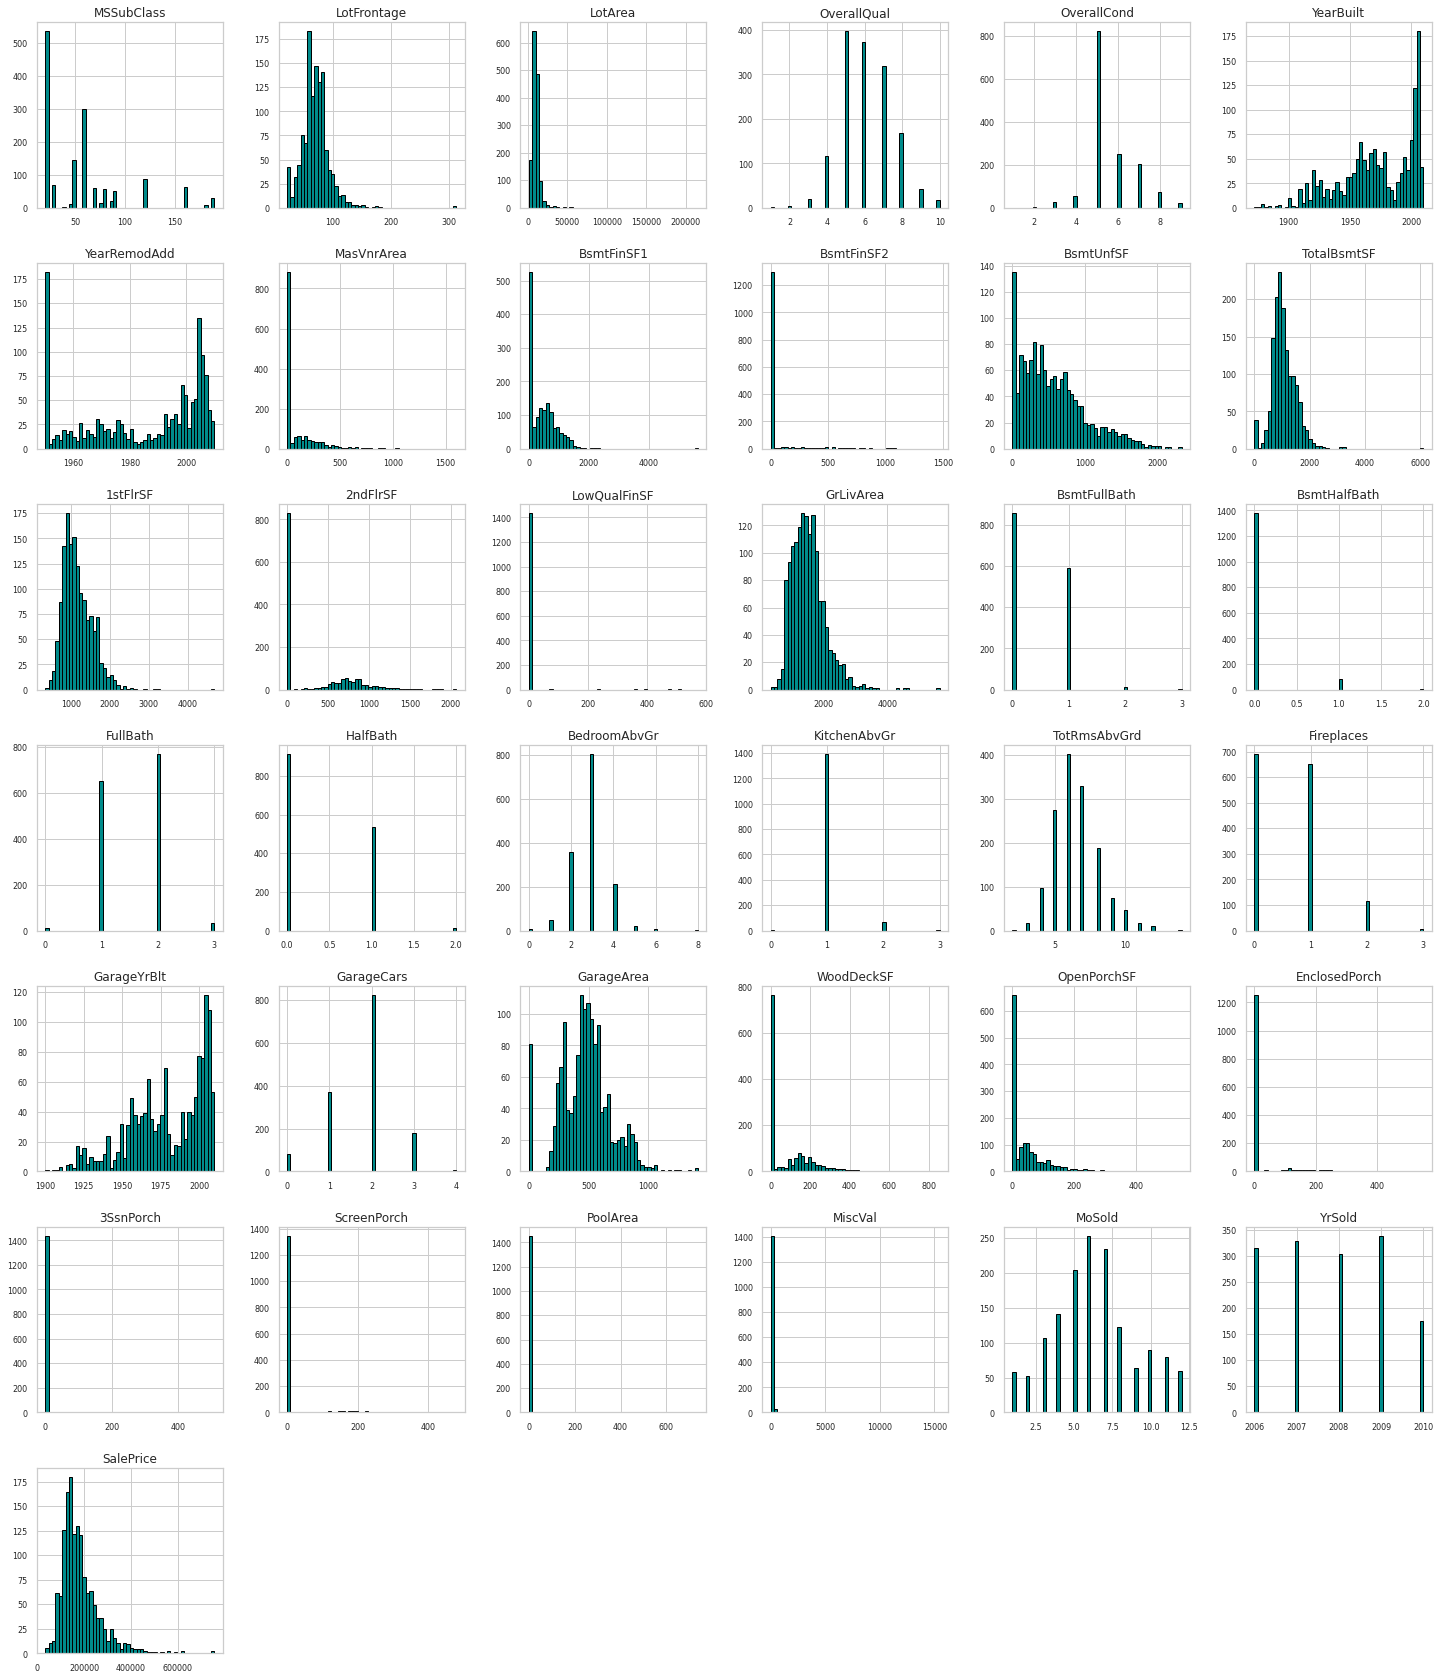

In [ ]:
fig_ = df_train_num.hist(figsize=(25, 30), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

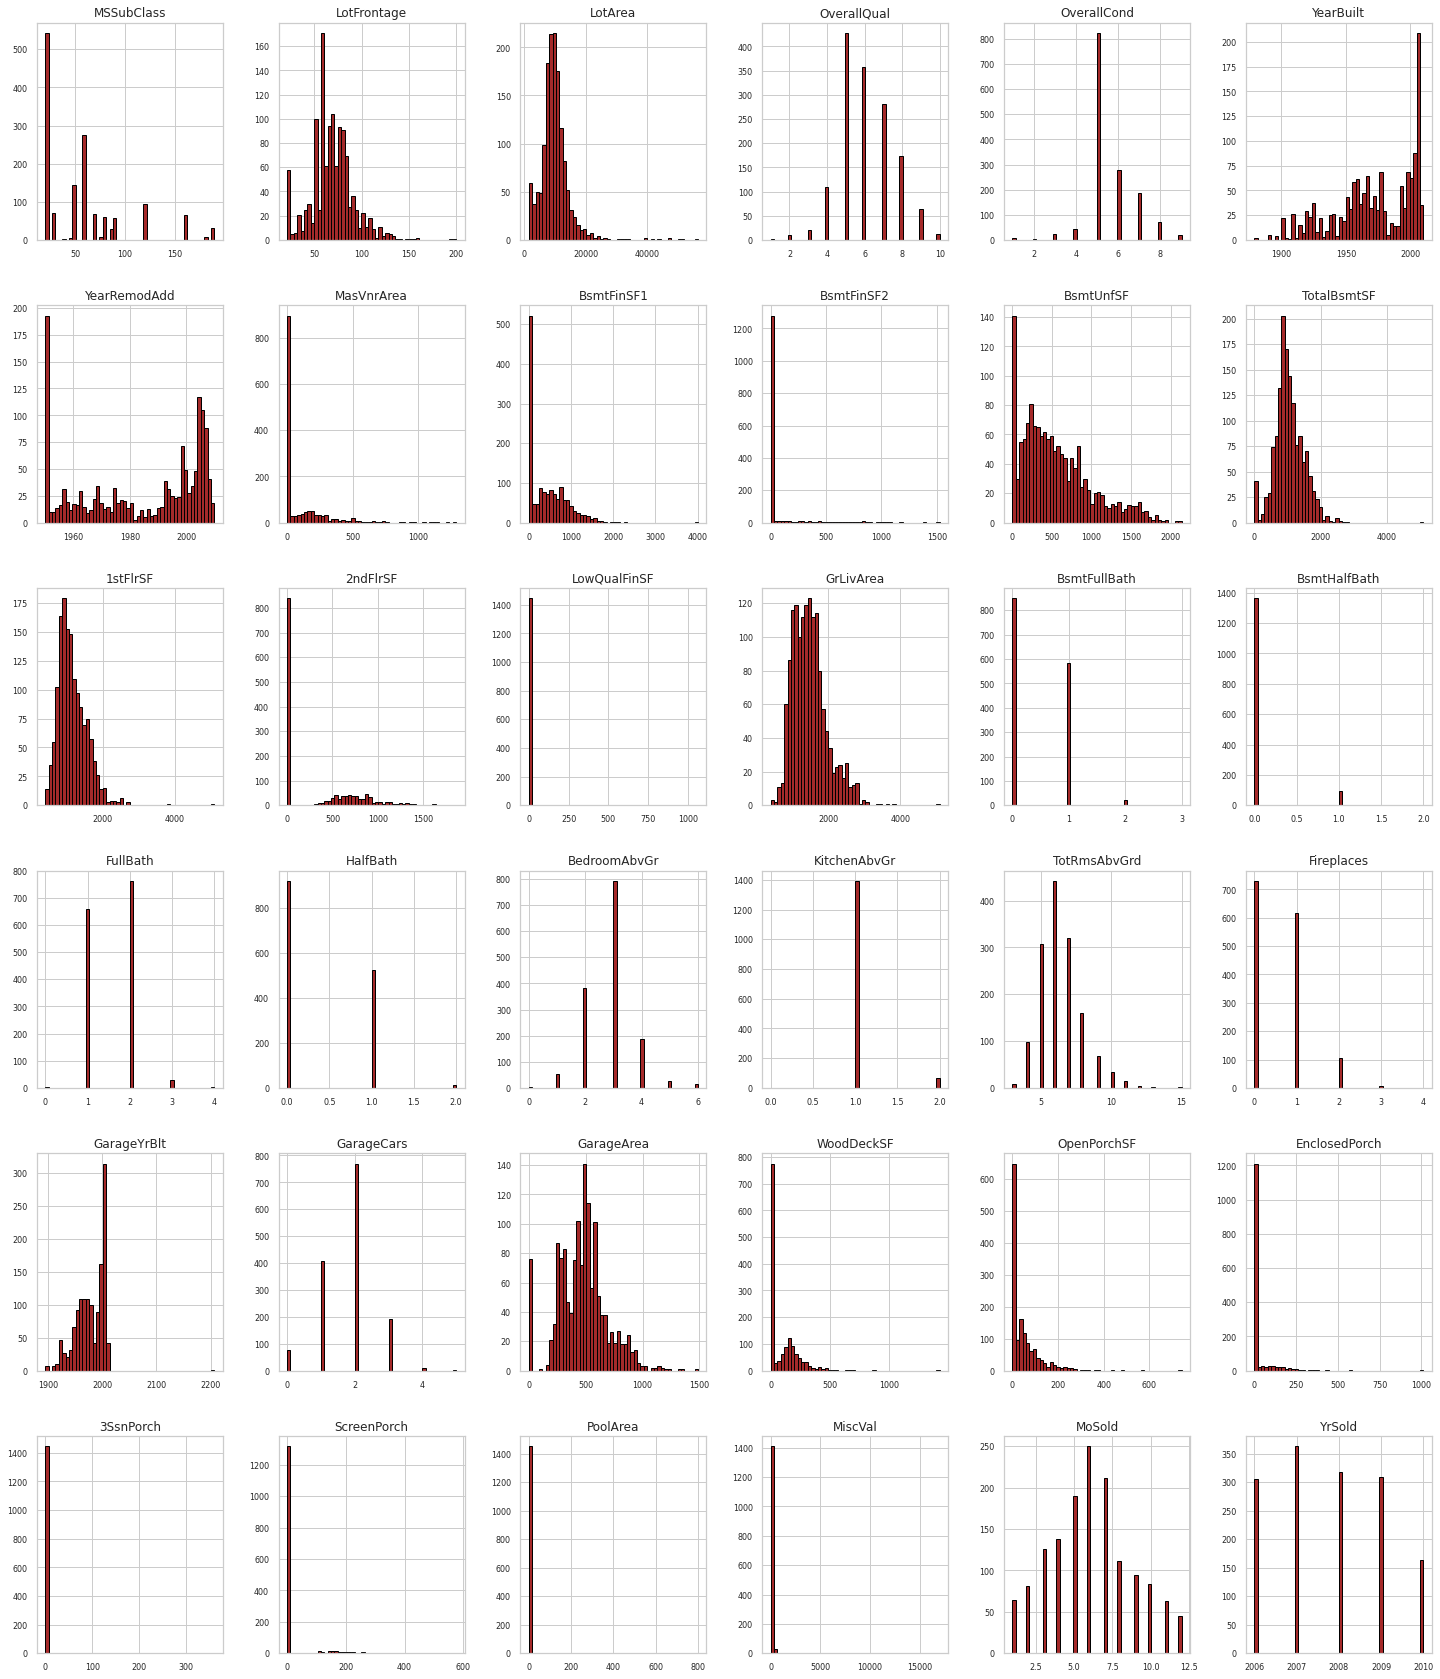

In [ ]:
fig_ = df_test_num.hist(figsize=(25, 30), bins=50, color="brown", edgecolor="black", xlabelsize=8, ylabelsize=8)

In [ ]:
df_train_num[:]['EnclosedPorch']

0         0
1         0
2         0
3       272
4         0
       ... 
1455      0
1456      0
1457      0
1458    112
1459      0
Name: EnclosedPorch, Length: 1460, dtype: int64

In [ ]:
sel = VarianceThreshold(threshold=0.05) 

sel.fit(df_train_num.iloc[:, :-1])

print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 35

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


In [ ]:
df_train_num.shape

(1460, 36)

In [ ]:
sel = VarianceThreshold(threshold=0.05) 

sel.fit(df_test_num.iloc[:, :-1])

print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_test_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_test_num.iloc[:, :-1].columns if x not in df_test_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

df_test_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 34

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


In [ ]:
df_test_num.shape

(1459, 35)

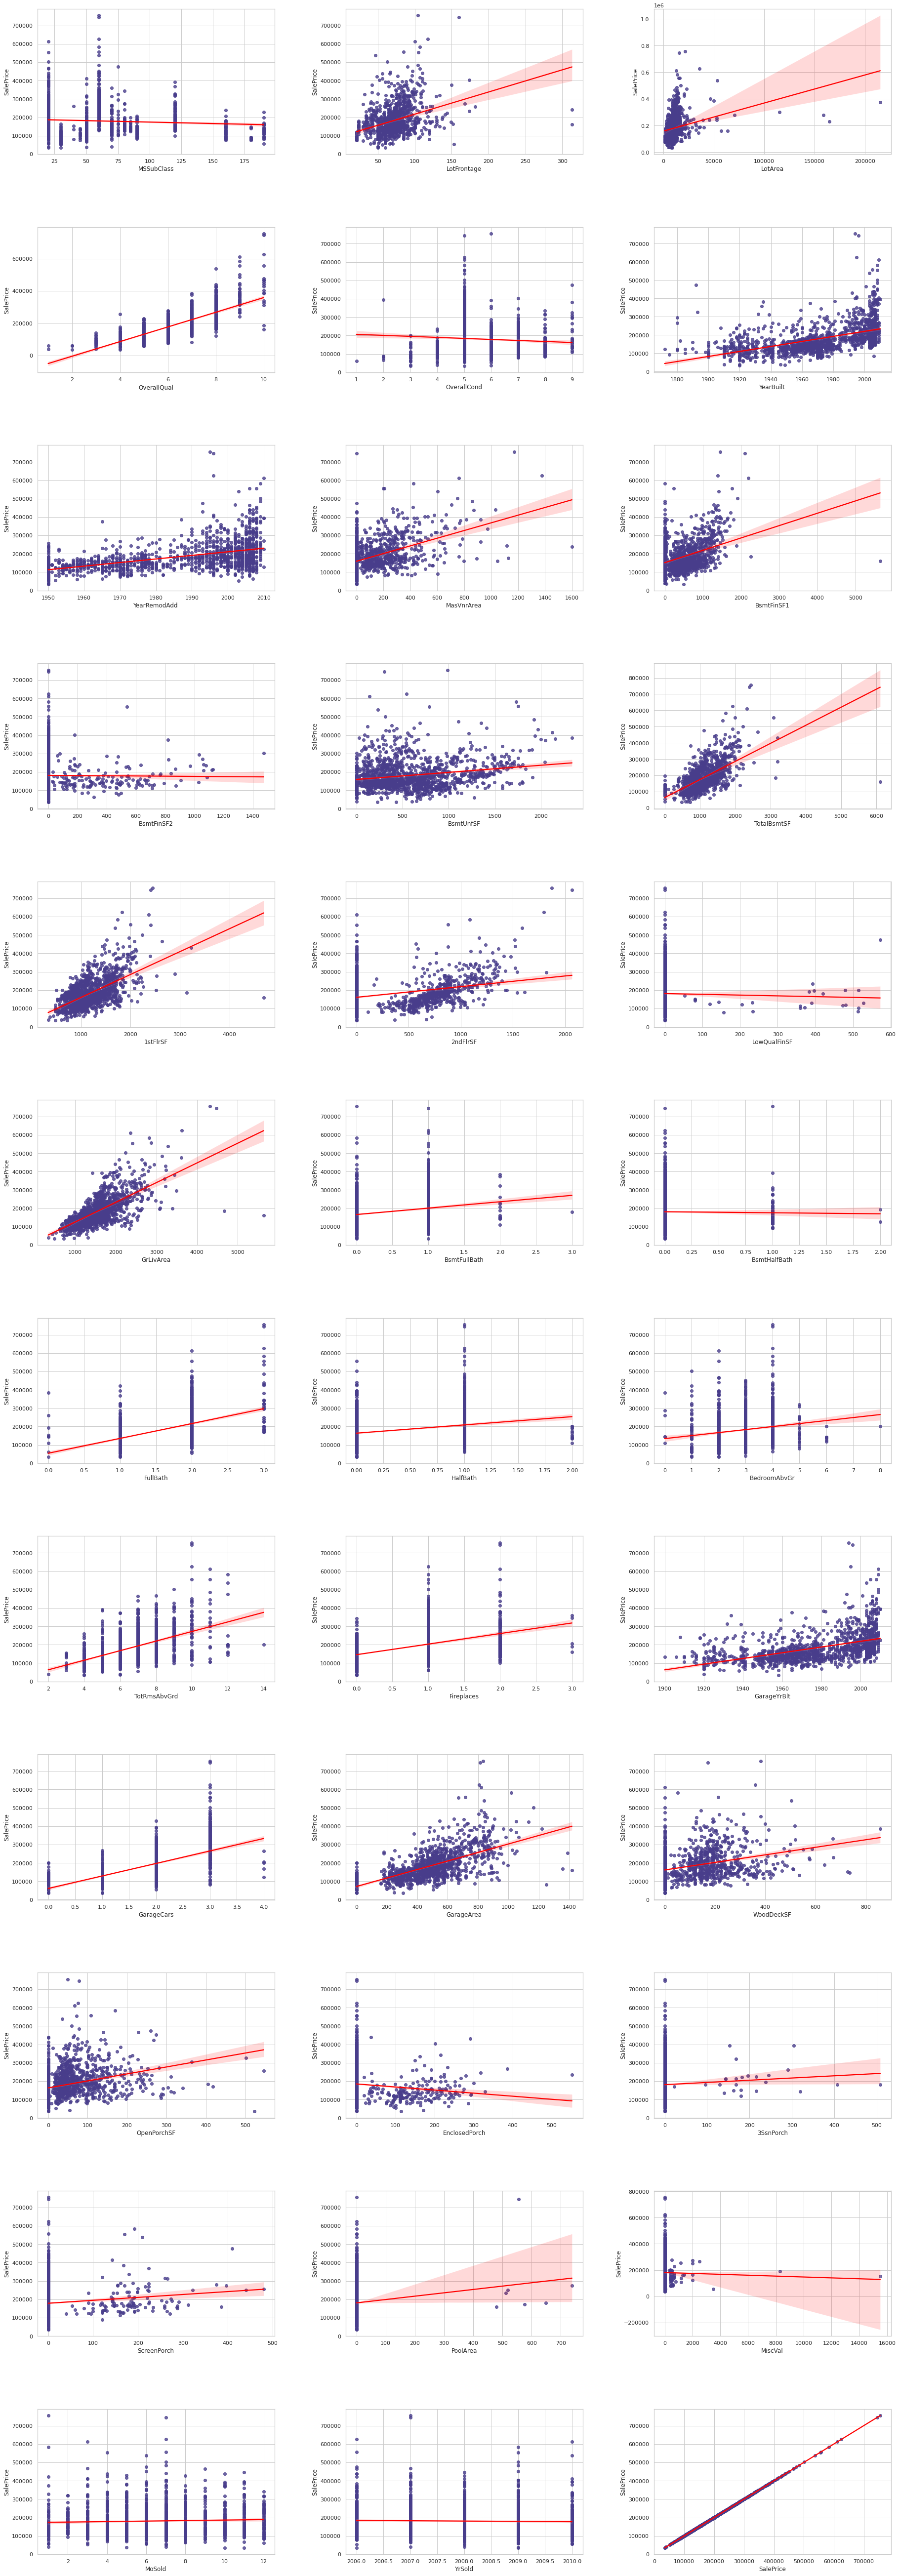

In [ ]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.9,wspace=0.3,hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

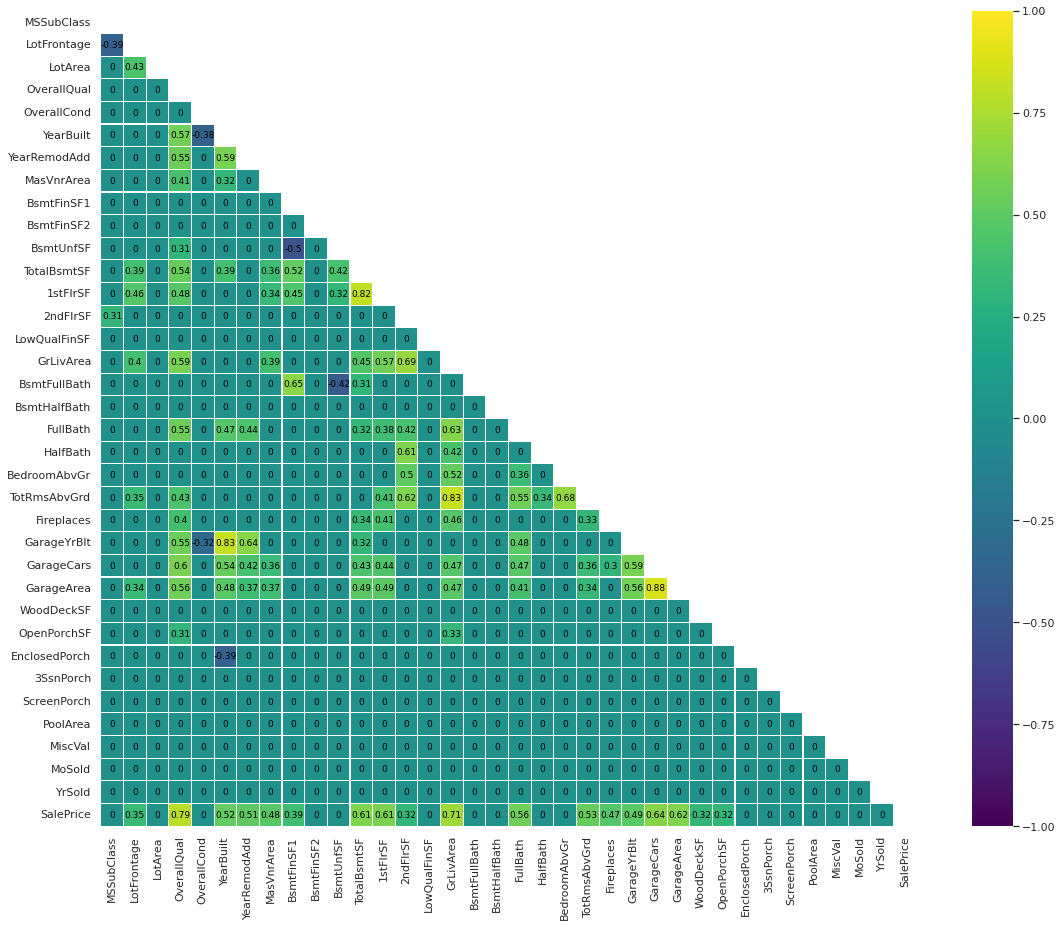

In [ ]:
pd.options.display.float_format = "{:,.2f}".format#PARAMETER

corr_matrix = df_train_num.corr(method = 'pearson')#metrik korelasi

corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0# Ganti korelasi < |0.3| dengan 0 untuk visibilitas yang lebih baik

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap = "viridis"
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [ ]:
XSC = ["GarageCars", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"]
XSC
#memiliki korelasi positif yang sangat kuat (setidaknya 0,7) termasuk variabel di bawah ini juga berbaris dalam urutan keturunan:
#"GarageArea" and "GarageCars" 
#"GarageYrBlt" and "YearBuilt" 
#"TotRmsAbvGrd" and "GrLivArea" 
#"1stFlrSF" and "TotalBsmtSF" 

['GarageCars', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']

2 strongly correlated values with SalePrice:
OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64



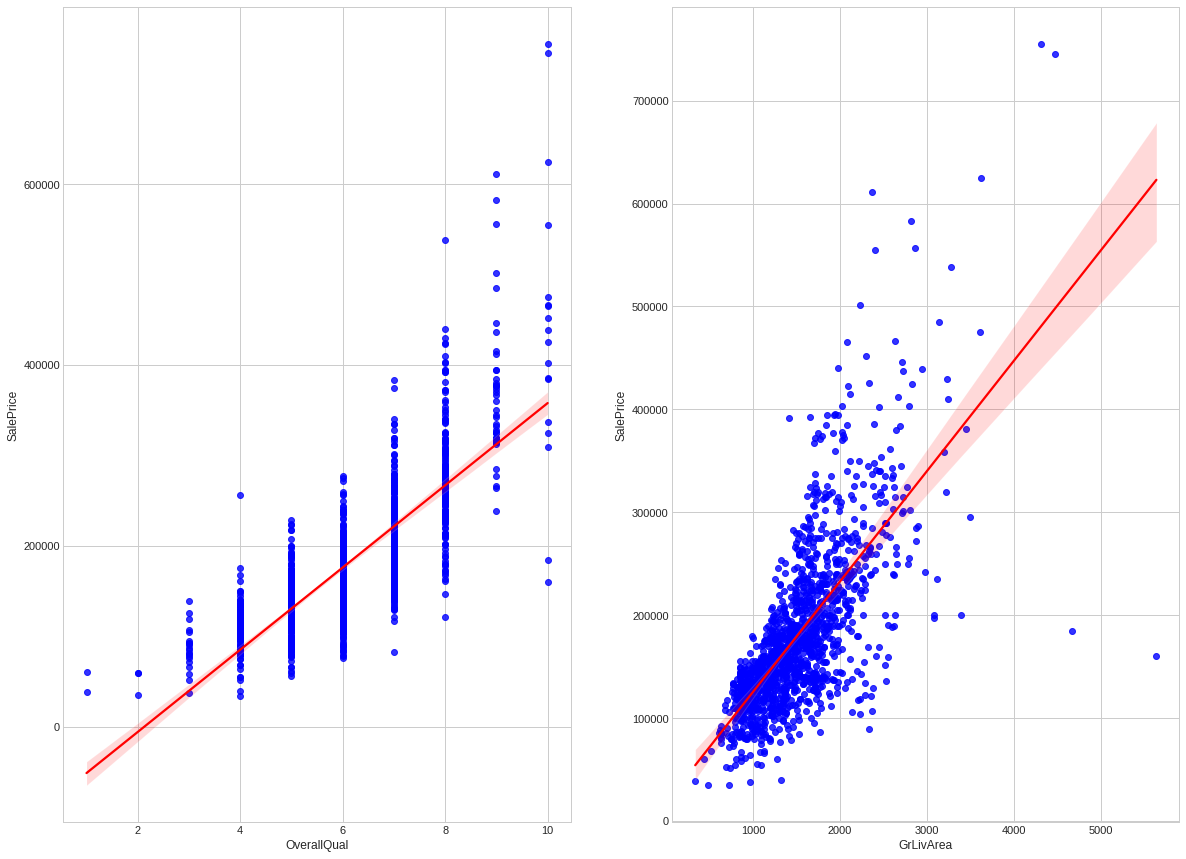

In [ ]:
#(r2 > 0.7)
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

strong_features_list = df_num_corr[abs(df_num_corr) >= 0.7].sort_values(ascending=False)
print(f"{len(strong_features_list)} strongly correlated values with SalePrice:\n{strong_features_list}\n")

strong_features = df_num_corr[abs(df_num_corr) >= 0.7].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  
fig, ax = plt.subplots(round(len(strong_features) / 3), 2)

for i, ax in enumerate(fig.axes):
    # plot korelasi setiap index dengan SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=df_strong_features, ax=ax, scatter_kws={
                    "color": "blue"}, line_kws={"color": "red"})

8 moderately correlated values with SalePrice:
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64



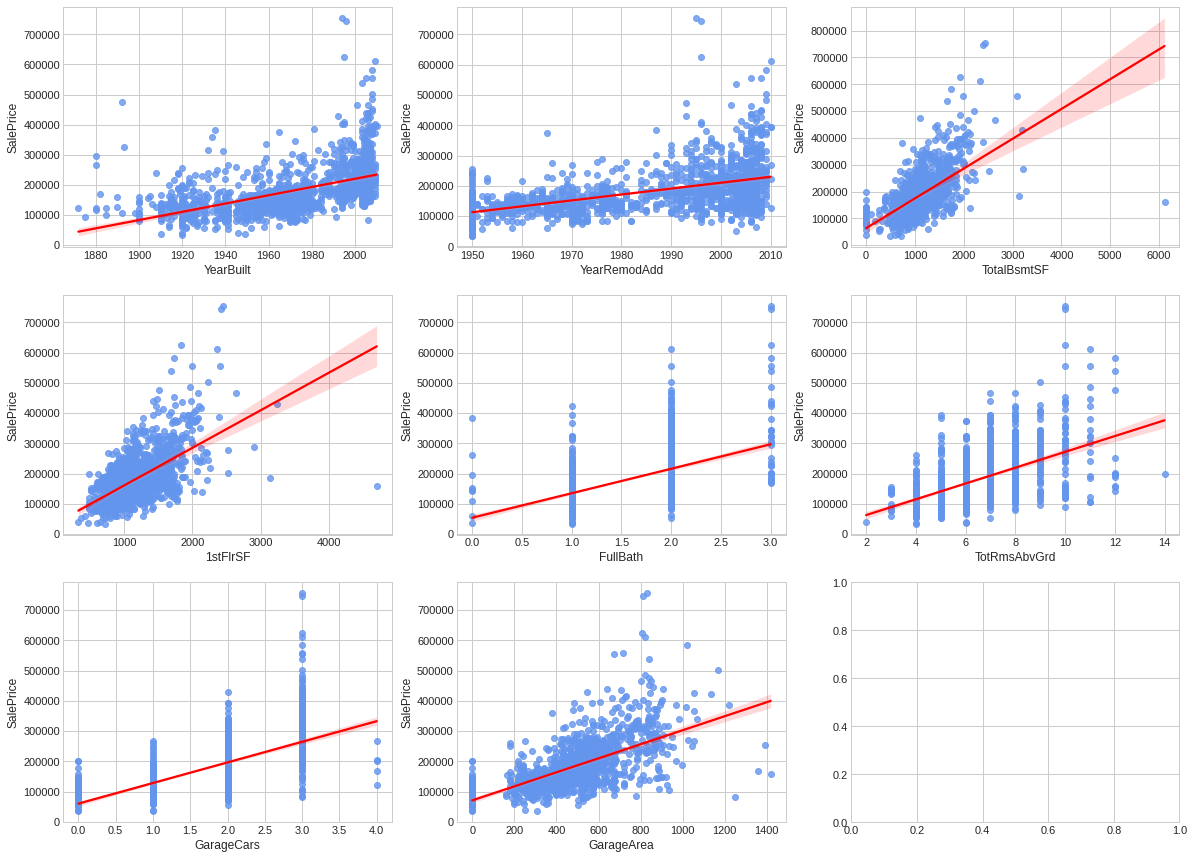

In [ ]:
#(0.5 < r2 < 0.7)
moderate_features_list = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].sort_values(ascending=False)
print(f"{len(moderate_features_list)} moderately correlated values with SalePrice:\n{moderate_features_list}\n")

moderate_features = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].index.tolist()
moderate_features.append("SalePrice")

df_moderate_features = df_train_num.loc[:, moderate_features]

plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(round(len(moderate_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    if i < len(moderate_features)-1:
        sns.regplot(x=moderate_features[i], y="SalePrice", data=df_moderate_features, ax=ax, scatter_kws={
                    "color": "cornflowerblue"}, line_kws={"color": "red"})

8 weakly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


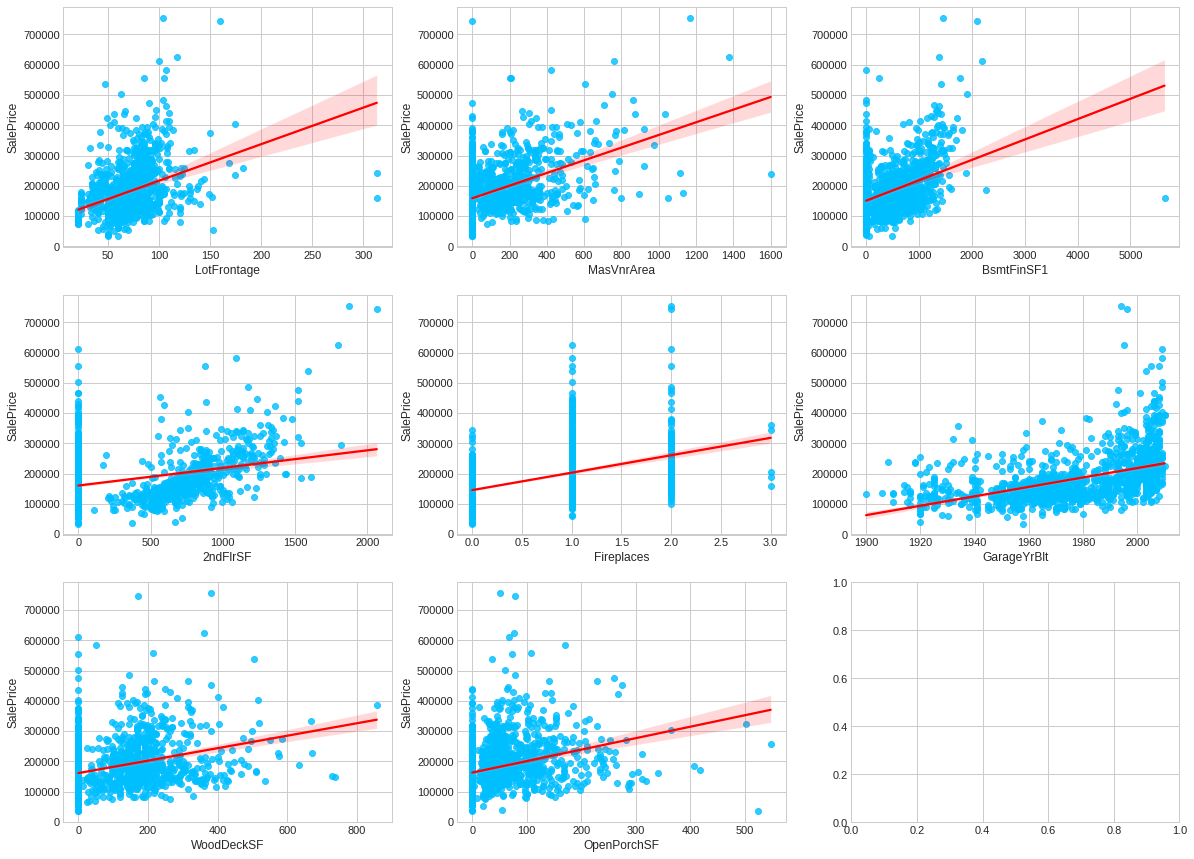

In [ ]:
#(0.3 < r2 < 0.5)
weak_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(weak_features_list)} weakly correlated values with SalePrice:\n{weak_features_list}")

weak_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (
    abs(df_num_corr) < 0.5)].index.tolist()
weak_features.append("SalePrice")

df_weak_features = df_train_num.loc[:, weak_features]

plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(round(len(weak_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    
    if i < len(weak_features) - 1:
        sns.regplot(x=weak_features[i], y="SalePrice", data=df_weak_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "red"},)

In [ ]:
list_of_numerical_features = strong_features[:-1] + moderate_features[:-1] + weak_features

df_train_num = df_train_num.loc[:, list_of_numerical_features]

df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]#pilih set pengujian

df_train_num.iloc[:, :-1]#menampilkan kolom keculai kolom terakhir

OverallQual  GrLivArea  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0               7       1710       2003          2003          856       856   
1               6       1262       1976          1976         1262      1262   
2               7       1786       2001          2002          920       920   
3               7       1717       1915          1970          756       961   
4               8       2198       2000          2000         1145      1145   
...           ...        ...        ...           ...          ...       ...   
1455            6       1647       1999          2000          953       953   
1456            6       2073       1978          1988         1542      2073   
1457            7       2340       1941          2006         1152      1188   
1458            5       1078       1950          1996         1078      1078   
1459            5       1256       1965          1965         1256      1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  LotFrontage  MasVnrArea  \
0            2             8           2         548        65.00      196.00   
1            2             6           2         460        80.00        0.00   
2            2             6           2         608        68.00      162.00   
3            1             7           3         642        60.00        0.00   
4            2             9           3         836        84.00      350.00   
...        ...           ...         ...         ...          ...         ...   
1455         2             7           2         460        62.00        0.00   
1456         2             7           2         500        85.00      119.00   
1457         2             9           1         252        66.00        0.00   
1458         1             5           1         240        68.00        0.00   
1459         1             6           1         276        75.00        0.00   

      BsmtFinSF1  2ndFlrSF  Fireplaces  GarageYrBlt  WoodDeckSF  OpenPorchSF  
0            706       854           0     2,003.00           0           61  
1            978         0           1     1,976.00         298            0  
2            486       866           1     2,001.00           0           42  
3            216       756           1     1,998.00           0           35  
4            655      1053           1     2,000.00         192           84  
...          ...       ...         ...          ...         ...          ...  
1455           0       694           1     1,999.00           0           40  
1456         790         0           2     1,978.00         349            0  
1457         275      1152           2     1,941.00           0           60  
1458          49         0           0     1,950.00         366            0  
1459         830         0           0     1,965.00         736           68  

[1460 rows x 18 columns]

In [ ]:
# drop fitur sangat beroralasi
for i, col in enumerate(XSC):
    if col in df_train_num.columns:
        df_train_num.drop(col, axis=1, inplace=True)

dif_3 = [x for x in XSC if x not in df_train_num.columns]#cek nama kolom apakah sama
print(f"Columns present in XSC and absent in df_train_num: {dif_3}\n")

for i, col in enumerate(XSC):
    if col in df_test_num.columns:
        df_test_num.drop(col, axis=1, inplace=True)

dif_4 = [x for x in XSC if x not in df_test_num.columns]
print(f"Columns present in XSC and absent in df_test_num: {dif_4}\n")

Columns present in XSC and absent in df_train_num: ['GarageCars', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']

Columns present in XSC and absent in df_test_num: ['GarageCars', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']



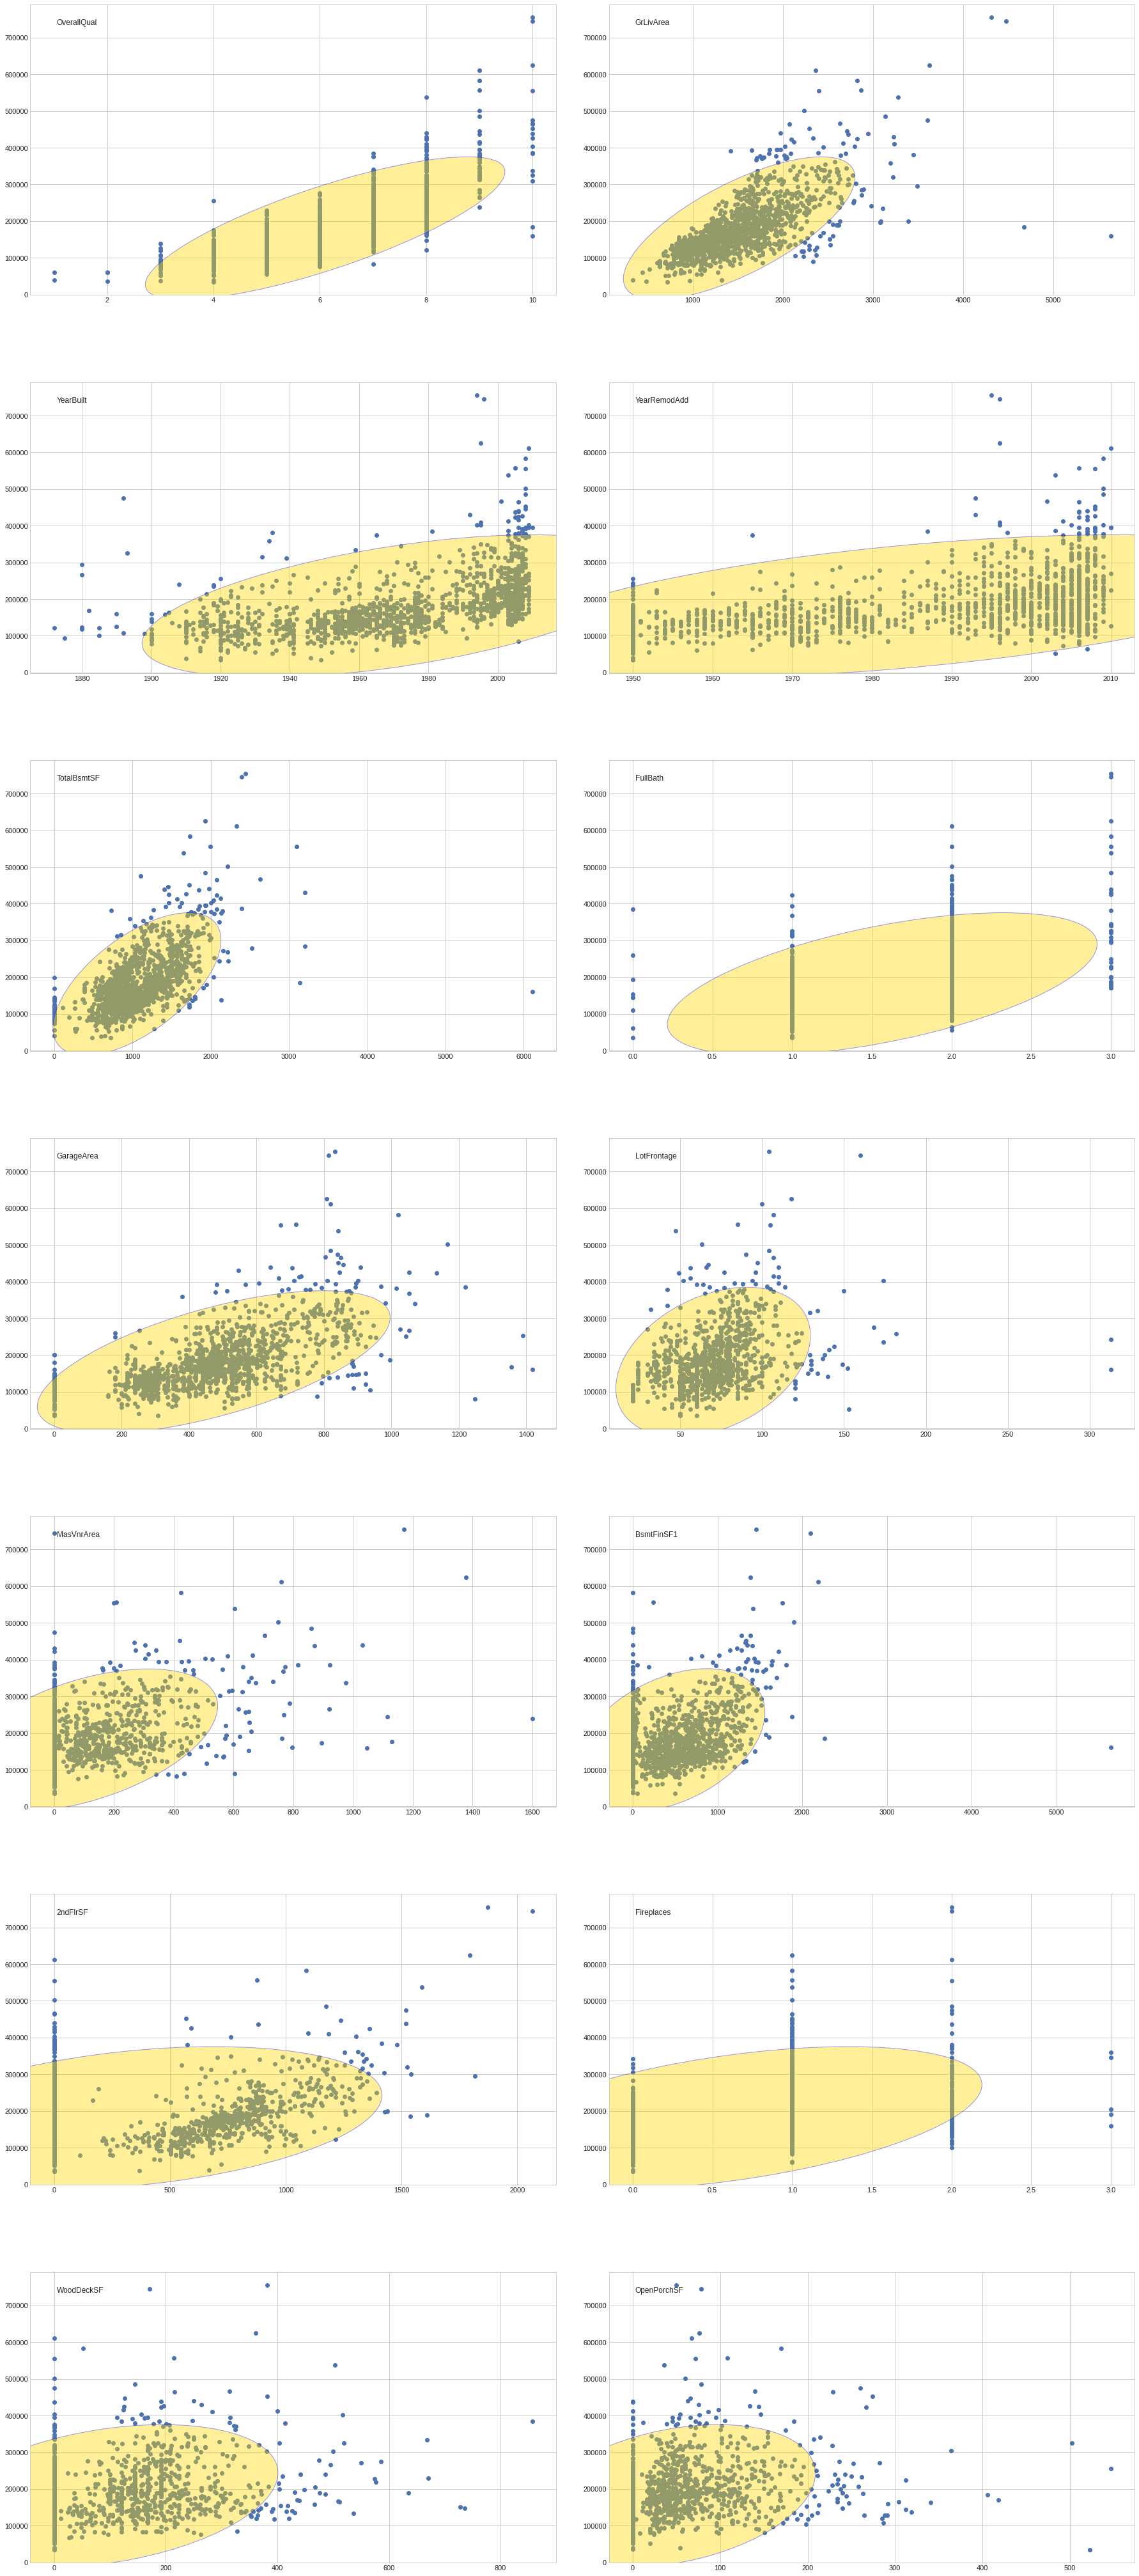

In [ ]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.1,
                    hspace=0.3) 
for i, col in enumerate(df_train_num.iloc[:, :-1].columns):
    df = df_train_num[[col, 'SalePrice']]
    df = df.dropna()
    df = df.to_numpy()

    covariance  = np.cov(df , rowvar=False)

    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    centerpoint = np.mean(df , axis=0)#titik tengah

    distances = []
    for j, val in enumerate(df):
            p1 = val
            p2 = centerpoint
            distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
            distances.append(distance)
    distances = np.array(distances)
#from Chi-Sqaure Distribution for detecting outliers
    cutoff = chi2.ppf(0.95, df.shape[1])

    outlierIndexes = np.where(distances > cutoff )

    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)
    
# Ellipse patch   
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='blue')
    ellipse.set_facecolor('gold')
    ellipse.set_alpha(0.4)
    ax = plt.subplot(9, 2, i+1)
    ax.add_artist(ellipse)

    plt.scatter(df[: , 0], df[ : , 1])
    ax.text(.05, .95, col , transform=ax.transAxes, ha="left", va="top")

In [ ]:
#diluar elips di grafik yang ada di atas adalah outlier

Text(0, 0.5, 'Column Name\n')

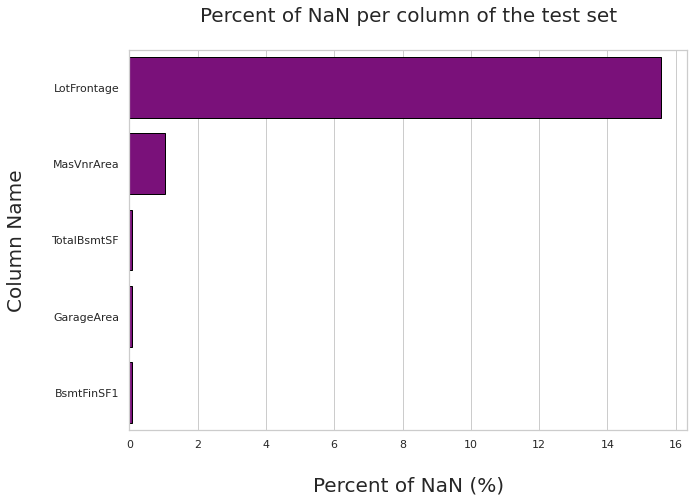

In [ ]:
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)

sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

In [ ]:
my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.columns = df_train_num.columns

In [ ]:
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

df_train_categ = df_train[categorical_features]

df_test_categ = df_test[categorical_features[:-1]]

In [ ]:
print(f"Training set shape (Categorical features {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features (1460, 20)

Test set shape (Categorical features): (1459, 20)



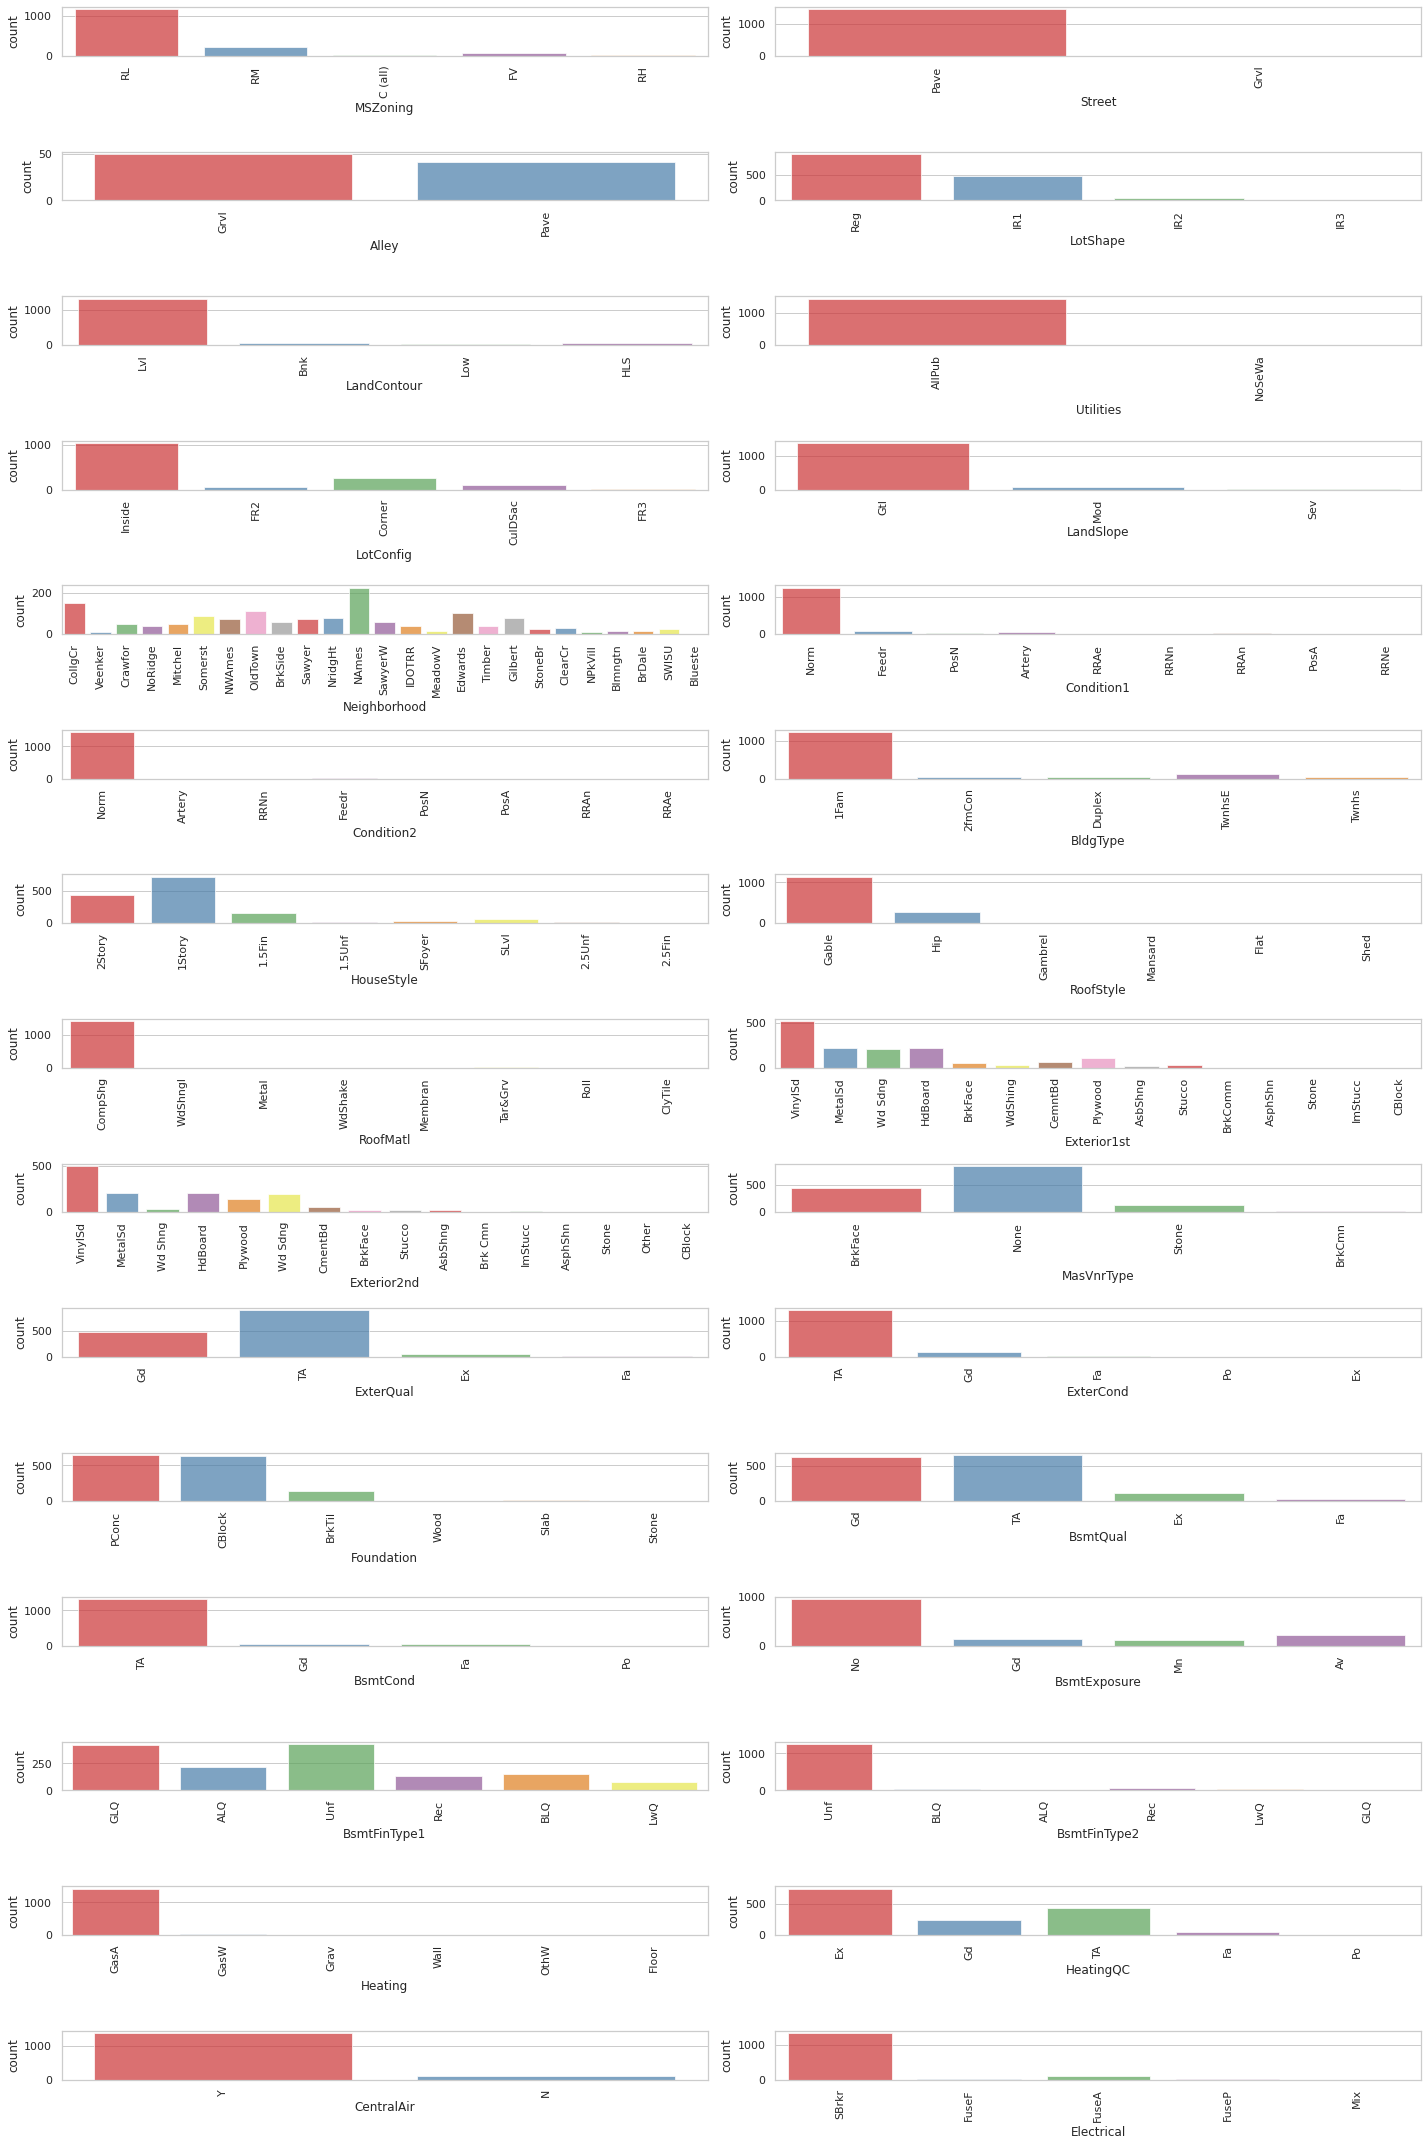

In [ ]:
fig, axes = plt.subplots(round(len(df_train_categ.columns) / 3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax, palette = "Set1")

fig.tight_layout()

In [ ]:
cols_to_drop = [
    'Street',
    'LandContour',
    'Utilities',
    'LandSlope',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
]


df_train_categ.drop(cols_to_drop, axis=1, inplace=True)

df_test_categ.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 29)

Test set shape (Categorical features): (1459, 28)



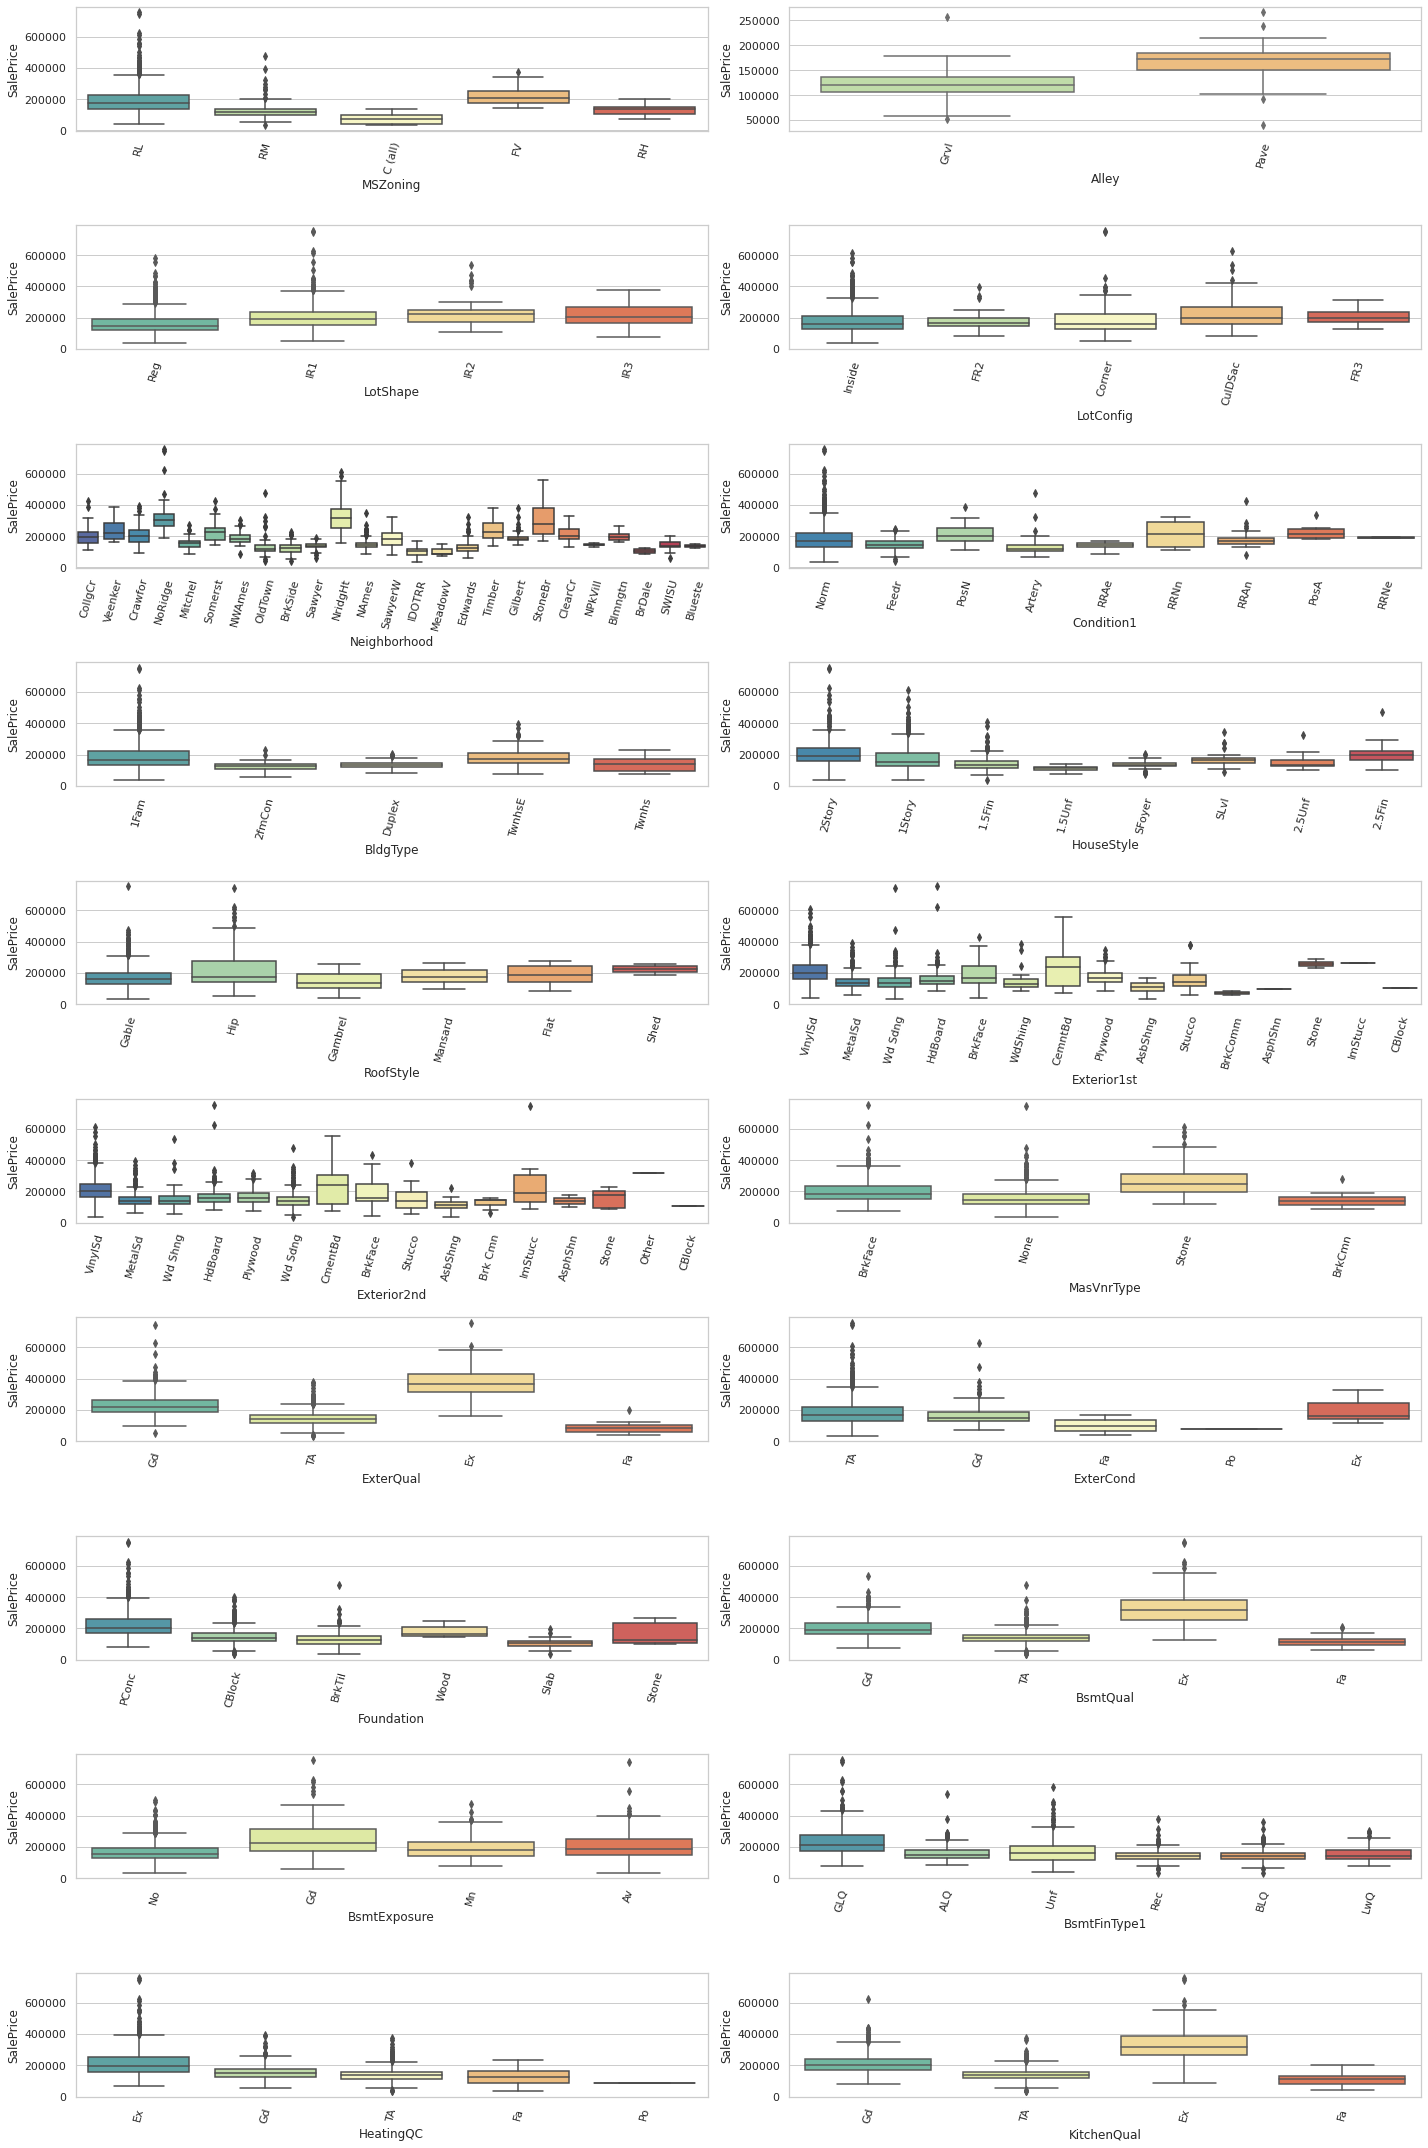

In [ ]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax, palette="Spectral_r")

fig.tight_layout()

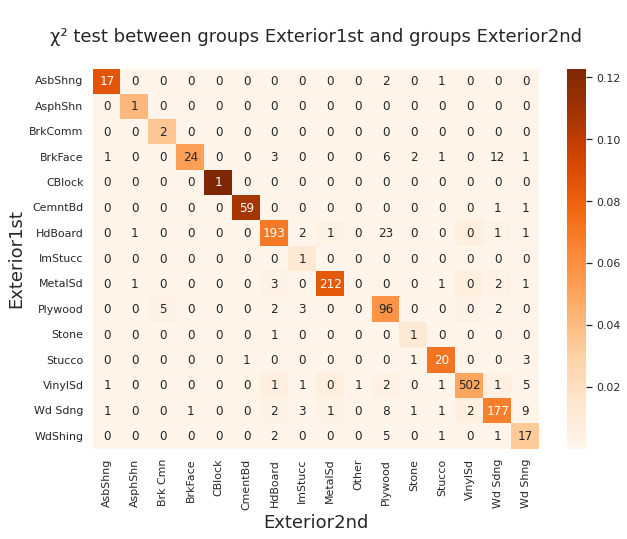

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0



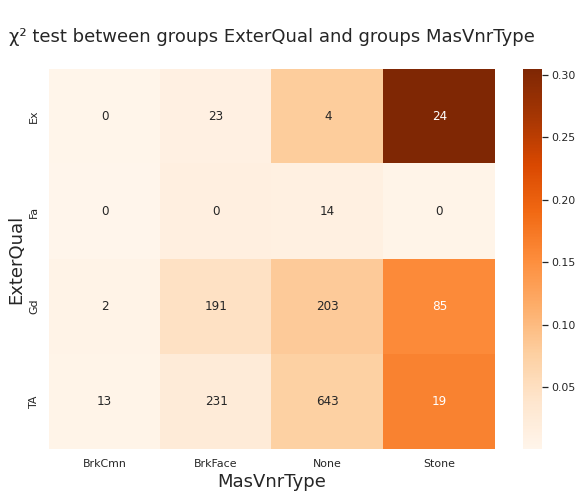

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54



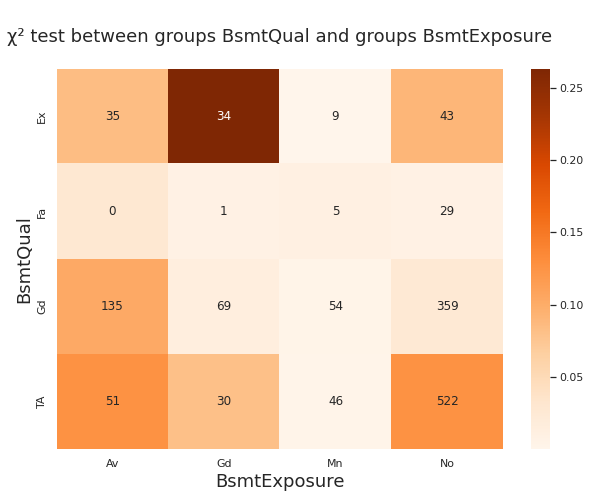

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



In [ ]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtExposure"]

for i, j in zip(X, Y):

    cont = df_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Ganti NaN dengan 0 di tabel kontingensi
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

In [ ]:
# drop dari salah satu masing masing variabel co-dependent
df_train_categ.drop(Y, axis=1, inplace=True)

df_test_categ.drop(Y, axis=1, inplace=True)

In [ ]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 26)

Test set shape (Categorical features): (1459, 25)



Text(0, 0.5, 'Column Name\n')

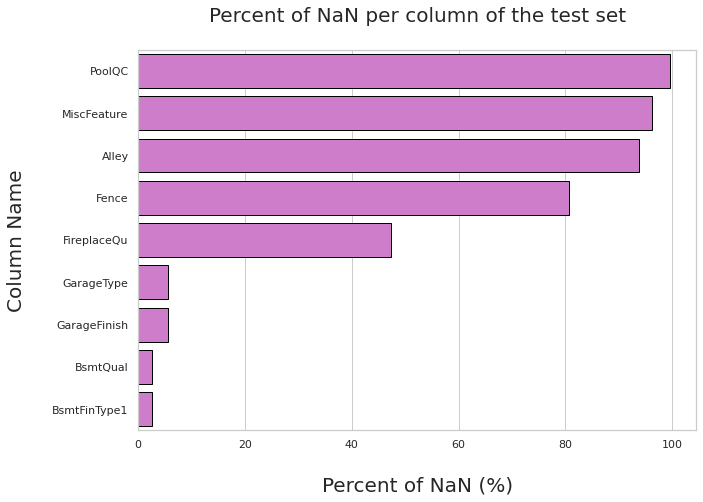

In [ ]:
# Check the NaN per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)

sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
tab

Column  Percent_NaN
6        PoolQC        99.52
8   MiscFeature        96.30
0         Alley        93.77
7         Fence        80.75
3   FireplaceQu        47.26
4    GarageType         5.55
5  GarageFinish         5.55
1      BsmtQual         2.53
2  BsmtFinType1         2.53

In [ ]:
# drop kolom kategoris yang memiliki setidaknya 30% nilai yang hilang
large_na = [col for col in column_with_nan if (df_train_categ[col].isna().sum()/df_train_categ.shape[0]) > 0.3]

print("Columns to be dropped:")
print(large_na)

df_train_categ.drop(large_na, axis=1, inplace=True)

Columns to be dropped:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
#mengisi NaN dengan the corresponding modal class
categ_fill_null = {"GarageType": df_train_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_train_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0]}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)

In [ ]:
# Kolom-kolom yang telah dihapus pada training set juga harus dihapus pada testing set agar kedua set data tersebut tetap identik untuk pemodelan dan prediksi.
df_test_categ.drop(large_na, axis=1, inplace=True)

Text(0, 0.5, 'Column Name\n')

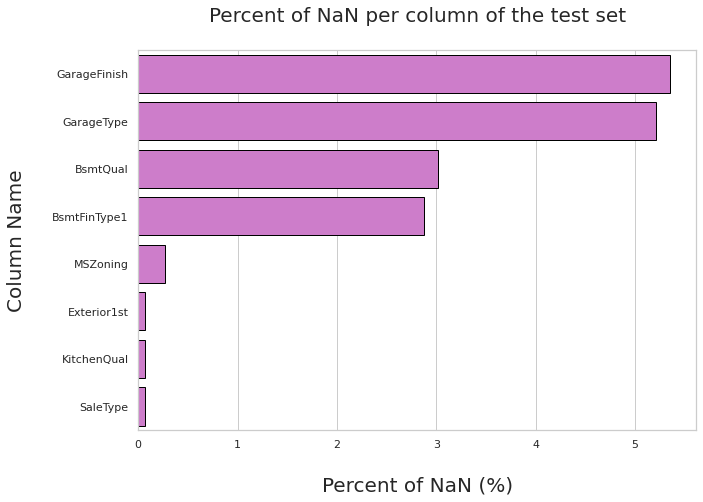

In [ ]:
# cek kembali kolom yang hilang berapa persen
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)

sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
#Rupanya, kolom dalam kumpulan data pengujian juga memiliki nilai yang hilang, tetapi tidak satupun dari kolom tersebut memiliki nilai yang hilang lebih dari 6%. 
#jadi akan mengisi setiap entri NaN untuk setiap fitur menggunakan kelas modal yang sesuai seperti yang sudah lakukan diatas
categ_fill_null = {"GarageType": df_test_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_test_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": df_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": df_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": df_test_categ["KitchenQual"].mode().iloc[0],
                   "SaleType": df_test_categ["SaleType"].mode().iloc[0]}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)

In [ ]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 21)

Test set shape (Categorical features): (1459, 20)



In [ ]:
# Drop SalePrice pada training dataset
df_train_categ.drop(["SalePrice"], axis = 1, inplace = True)
#menggambungkan data kategoris dengan data numerik yang diperoleh setelah pembersihan, kita perlu mengubah entri kategoris menjadi entri numerik
df_train_dummies = pd.get_dummies(df_train_categ)
df_train_dummies.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             0             0             0             1                 0   
2             1             0             0             0                 0   
3             1             0             0             0                 1   
4             1             0             0             0                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0  

In [ ]:
df_test_dummies = pd.get_dummies(df_test_categ)
df_test_dummies.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             1             0             0             0                 1   
2             1             0             0             0                 0   
3             1             0             0             0                 0   
4             1             0             0             0                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              0              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 1   
4                  0              0              0                 1   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   1                     0                    0   
1                   1                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0  

In [ ]:
dif_1 = [x for x in df_train_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_dummies.columns if x not in df_train_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']

Features present in df_test_categ set and absent in df_train_categ: []


In [ ]:
#seperti output di atas ada 3 kolom yang berbeda dan itu akan di drop
df_train_dummies.drop(dif_1, axis=1, inplace=True)#menjatuhkan 3 kolom yang bebeda

dif_1 = [x for x in df_train_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


In [ ]:
print(f"Training set shape (Categorical features): {df_train_dummies.shape}\n")
print(f"Test set shape (Categorical features): {df_test_dummies.shape}\n")

Training set shape (Categorical features): (1460, 137)

Test set shape (Categorical features): (1459, 137)



In [ ]:
#menggabungkan dataset numerik dan kategorial sebelum melakukan pemodelan
df_train_new = pd.concat([df_train_imputed, df_train_dummies], axis = 1)
print(f"Train set: {df_train_new.shape}")

df_test_new = pd.concat([df_test_imputed, df_test_dummies], axis = 1)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 152)
Test set: (1459, 151)


In [ ]:
#handing outlier di GrLivArea", "TotalBsmtSF" dan "GarageArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# Outliers di "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

#list outlier
outliers = outliers1 + outliers2
outliers = list(set(outliers))
print(outliers)


df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

[]


In [ ]:
# Convert Year of remodeling to the Age of the house since the remodeling
df_train_new["AgeSinceRemod"] = (df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"])

df_test_new["AgeSinceRemod"] = (df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [ ]:
df_test_new.head()

OverallQual  GrLivArea  TotalBsmtSF  FullBath  GarageArea  LotFrontage  \
0         5.00     896.00       882.00      1.00      730.00        80.00   
1         6.00   1,329.00     1,329.00      1.00      312.00        81.00   
2         5.00   1,629.00       928.00      2.00      482.00        74.00   
3         6.00   1,604.00       926.00      2.00      470.00        78.00   
4         8.00   1,280.00     1,280.00      2.00      506.00        43.00   

   MasVnrArea  BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  OpenPorchSF  \
0        0.00      468.00      0.00        0.00      140.00         0.00   
1      108.00      923.00      0.00        0.00      393.00        36.00   
2        0.00      791.00    701.00        1.00      212.00        34.00   
3       20.00      602.00    678.00        1.00      360.00        36.00   
4        0.00      263.00      0.00        0.00        0.00        82.00   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             1             0             0             0                 1   
2             1             0             0             0                 0   
3             1             0             0             0                 0   
4             1             0             0             0                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              0              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 1   
4                  0              0              0                 1   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neigh

In [ ]:
continuous_features = ["OverallQual", "TotalBsmtSF", "GrLivArea",
                       "FullBath", "GarageArea","MasVnrArea", "Fireplaces", "AgeSinceConst", "AgeSinceRemod"]
df_skew_verify = df_train_new.loc[:, continuous_features]
df_skew_verify.head()

OverallQual  TotalBsmtSF  GrLivArea  FullBath  GarageArea  MasVnrArea  \
0         7.00       856.00   1,710.00      2.00      548.00      196.00   
1         6.00     1,262.00   1,262.00      2.00      460.00        0.00   
2         7.00       920.00   1,786.00      2.00      608.00      162.00   
3         7.00       756.00   1,717.00      1.00      642.00        0.00   
4         8.00     1,145.00   2,198.00      2.00      836.00      350.00   

   Fireplaces  AgeSinceConst  AgeSinceRemod  
0        0.00           7.00           7.00  
1        1.00          34.00          34.00  
2        1.00           9.00           8.00  
3        1.00          95.00          40.00  
4        1.00          10.00          10.00

In [ ]:
df_skew_verify = df_train_new.loc[:, continuous_features]

skew_ft = []

for i in continuous_features:
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})


sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['TotalBsmtSF', 'GrLivArea', 'MasVnrArea', 'Fireplaces', 'AgeSinceConst', 'AgeSinceRemod']


In [ ]:
for i in sk_features:
    # Training set
    df_train_new[i] = np.log((df_train_new[i])+1)
    
    # Test set
    df_test_new[i] = np.log((df_test_new[i])+1)

In [ ]:
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

df_train_new.drop(["SalePrice"], axis=1, inplace=True)

In [ ]:
df_train_new

OverallQual  GrLivArea  TotalBsmtSF  FullBath  GarageArea  LotFrontage  \
0            7.00       7.44         6.75      2.00      548.00        65.00   
1            6.00       7.14         7.14      2.00      460.00        80.00   
2            7.00       7.49         6.83      2.00      608.00        68.00   
3            7.00       7.45         6.63      1.00      642.00        60.00   
4            8.00       7.70         7.04      2.00      836.00        84.00   
...           ...        ...          ...       ...         ...          ...   
1453         6.00       7.41         6.86      2.00      460.00        62.00   
1454         6.00       7.64         7.34      2.00      500.00        85.00   
1455         7.00       7.76         7.05      2.00      252.00        66.00   
1456         5.00       6.98         6.98      1.00      240.00        68.00   
1457         5.00       7.14         7.14      1.00      276.00        75.00   

      MasVnrArea  BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  OpenPorchSF  \
0           5.28      706.00    854.00        0.00        0.00        61.00   
1           0.00      978.00      0.00        0.69      298.00         0.00   
2           5.09      486.00    866.00        0.69        0.00        42.00   
3           0.00      216.00    756.00        0.69        0.00        35.00   
4           5.86      655.00  1,053.00        0.69      192.00        84.00   
...          ...         ...       ...         ...         ...          ...   
1453        0.00        0.00    694.00        0.69        0.00        40.00   
1454        4.79      790.00      0.00        1.10      349.00         0.00   
1455        0.00      275.00  1,152.00        1.10        0.00        60.00   
1456        0.00       49.00      0.00        0.00      366.00         0.00   
1457        0.00      830.00      0.00        0.00      736.00        68.00   

      MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
1453                 0            0            0            1            0   
1454                 0            0            0            1            0   
1455                 0            0            0            1            0   
1456                 0            0            0            1            0   
1457                 0            0            0            1            0   

      LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0                0             0             0             1   
1                0             0             0             1   
2                1             0             0             0   
3                1             0             0             0   
4                1             0             0             0   
...            ...           ...           ...           ...   
1453             0             0             0             1   
1454             0             0             0             1   
1455             0             0             0             1   
1456             0             0             0             1   
1457             0             0             0             1   

      LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                    0                  0              0              0   
1                    0                  0              1              0   
2                    0                  0              0              0   
3                    1                  0              0              0   
4              

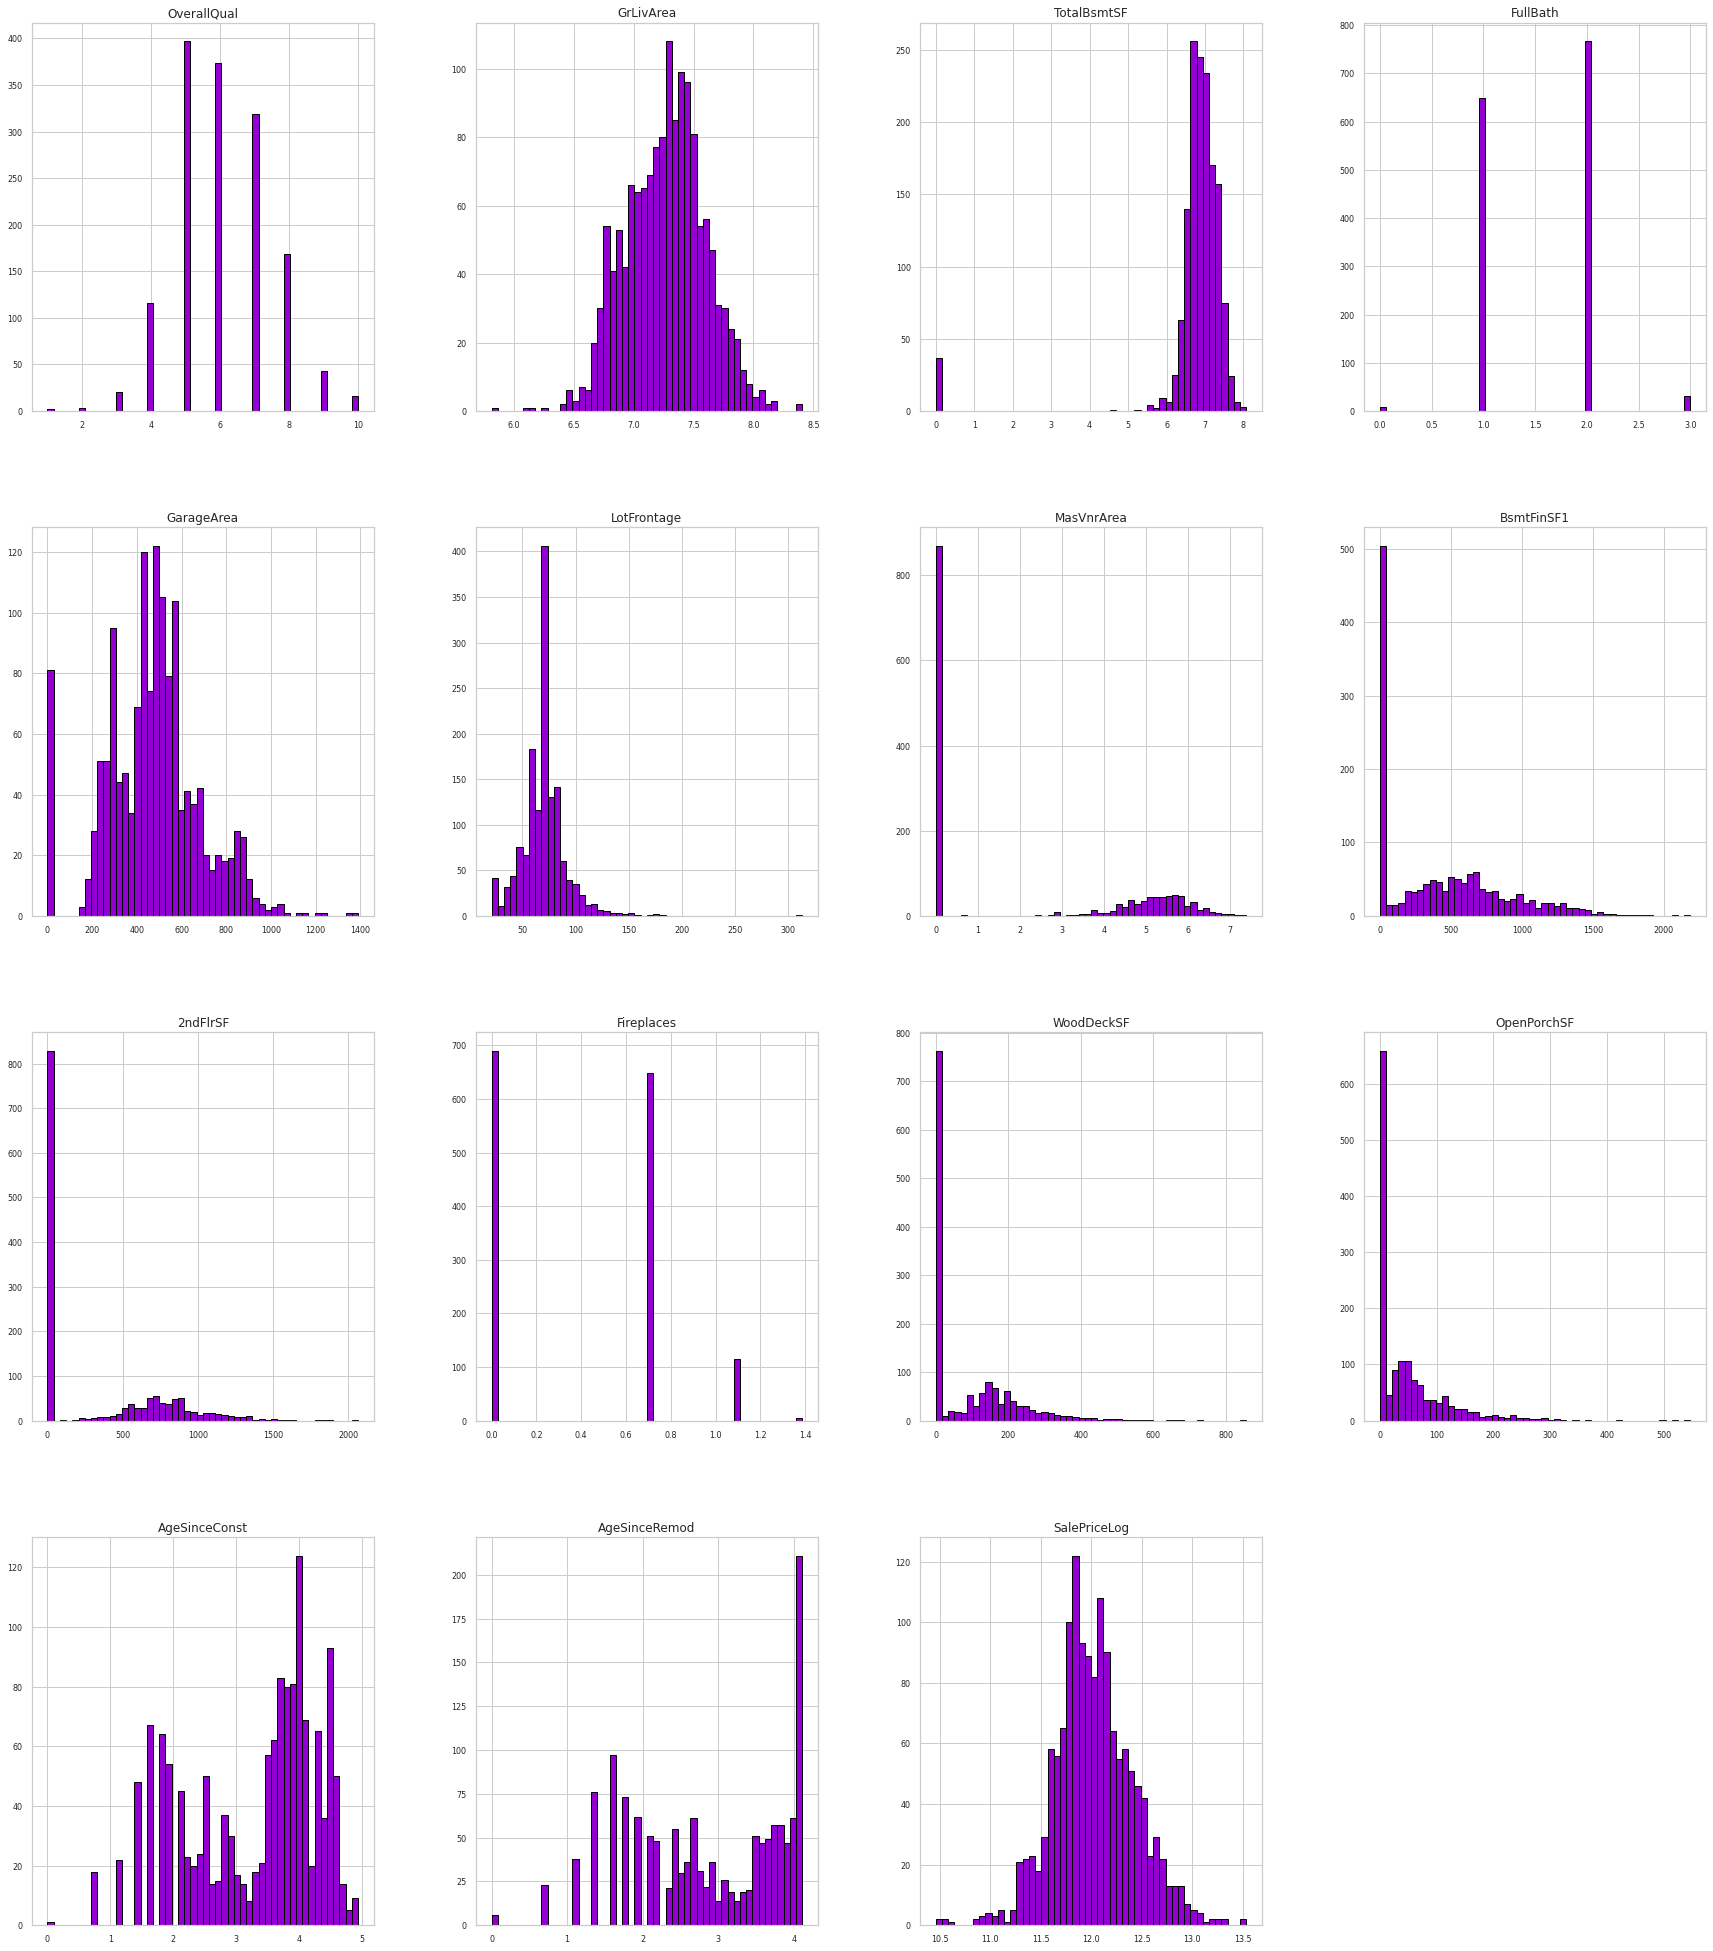

In [ ]:
numerical_cols_new = [cname for cname in df_train_new.columns if 
                      df_train_new[cname].dtype in ['int64', 'float64']]

df_train_new_num = df_train_new[numerical_cols_new].copy()

fig_ = df_train_new_num.hist(figsize=(30, 35), bins=50, color="darkviolet",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

In [ ]:
#fitur (x)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "SalePriceLog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1458, 151)
(1458,)


In [ ]:
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1166, 151)
y_train:(1166,)

X_test:(292, 151)
y_test:(292,)


In [ ]:
from sklearn import preprocessing


std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
df_test_new = std_scale.transform(df_test_new)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

In [ ]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


backward_regression(X_train, y_train)

worst_feature : BsmtFinType1_Rec, 0.9908551108926018 
worst_feature : Neighborhood_Blmngtn, 0.9870601041575309 
worst_feature : Exterior1st_VinylSd, 0.9820880278459683 
worst_feature : Neighborhood_Gilbert, 0.9672760426663528 
worst_feature : GarageType_Detchd, 0.9607299919571701 
worst_feature : HeatingQC_Po, 0.9539127527643698 
worst_feature : HeatingQC_Gd, 0.9928337873636104 
worst_feature : FullBath, 0.9201681869013614 
worst_feature : Neighborhood_Somerst, 0.9060650743758231 
worst_feature : Foundation_Stone, 0.8869021919082045 
worst_feature : Foundation_CBlock, 0.9843860777283403 
worst_feature : LotConfig_FR3, 0.8753286709528255 
worst_feature : LotConfig_Corner, 0.9051517589352586 
worst_feature : GarageFinish_RFn, 0.8596171912519273 
worst_feature : Condition1_RRAn, 0.8514716294817788 
worst_feature : Neighborhood_NWAmes, 0.8443695373775648 
worst_feature : GarageFinish_Unf, 0.844255411378186 
worst_feature : Condition1_Feedr, 0.8394351616822384 
worst_feature : Condition1_RR

In [ ]:
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

In [ ]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]


vif["features"] = X_train.columns
vif.round(1)

VIF Factor               features
0         4.00            OverallQual
1         3.90              GrLivArea
2         1.40            TotalBsmtSF
3         2.00             GarageArea
4         1.70            LotFrontage
5         1.60             BsmtFinSF1
6         1.60             Fireplaces
7         1.20             WoodDeckSF
8         1.10       MSZoning_C (all)
9         1.60            MSZoning_FV
10        2.10            MSZoning_RL
11        1.10           LotShape_IR2
12        1.20      LotConfig_CulDSac
13        1.30   Neighborhood_BrkSide
14        1.10   Neighborhood_ClearCr
15        1.20   Neighborhood_Crawfor
16        1.20   Neighborhood_Edwards
17        1.40   Neighborhood_MeadowV
18        1.30   Neighborhood_NoRidge
19        1.70   Neighborhood_NridgHt
20        1.20   Neighborhood_StoneBr
21        1.10   Neighborhood_Veenker
22        1.50      Condition1_Artery
23        1.50        Condition1_Norm
24        1.10        Condition1_RRAe
25        1.30        BldgType_Duplex
26        1.50         BldgType_Twnhs
27        1.70        BldgType_TwnhsE
28       10.50      HouseStyle_1.5Fin
29        2.10      HouseStyle_1.5Unf
30       28.10      HouseStyle_1Story
31       22.00      HouseStyle_2Story
32        4.50      HouseStyle_SFoyer
33        5.80        HouseStyle_SLvl
34        1.10    Exterior1st_BrkComm
35        1.20    Exterior1st_BrkFace
36        1.30    Exterior1st_Wd Sdng
37        1.10           ExterCond_Fa
38        1.10           ExterCond_Po
39        1.70      Foundation_BrkTil
40        1.10        Foundation_Wood
41        2.70            BsmtQual_Ex
42        2.90            BsmtQual_Gd
43        1.20       BsmtFinType1_ALQ
44        1.70           HeatingQC_Ex
45        1.60         KitchenQual_Ex
46        1.10     GarageType_CarPort
47        1.40            SaleType_WD
48        1.20  SaleCondition_Abnorml
49        1.00   SaleCondition_Family
50        7.10          AgeSinceConst
51        2.70          AgeSinceRemod

In [ ]:
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
   
    print(f"None of the features have a high multicollinearity")
else:
    print(f"List of features with high multicollinearity: {high_vif_list}")

List of features with high multicollinearity: ['HouseStyle_1.5Fin', 'HouseStyle_1Story', 'HouseStyle_2Story']


In [ ]:
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

df_test_new.drop(high_vif_list, axis=1, inplace=True)

In [ ]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

np.set_printoptions(suppress=True)

influence = lr.get_influence()

cooks = influence.cooks_distance

cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

Cook_Distance  p_value
0           0.00     1.00
1           0.00     1.00
2           0.00     1.00
3           0.00     1.00
4           0.00     1.00

In [ ]:
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: [89]


In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_lin = LinearRegression()
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_

def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"**** Regressor: {model} ****")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

Linear Regression

In [ ]:
scores_lin = cross_val_score(model_lin, X_train, y_train,
                 cv=5)

print("Mean scores (Linear Model):\n", np.mean(scores_lin))
print("Standard deviation of scores (Linear Model):\n", np.std(scores_lin))

Mean scores (Linear Model):
 0.906221438746751
Standard deviation of scores (Linear Model):
 0.007714271279749533


In [ ]:
scores_lin

array([0.91494008, 0.89312957, 0.91083592, 0.90230506, 0.90989657])

In [ ]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

**** Regressor: Linear ****
R²: 0.8983812672564343
RMSE: 0.1345246918365072



In [ ]:
model_list = []
r2_list = []
rmse_list = []

model_list.append(model_lin.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lin), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lin), 4))

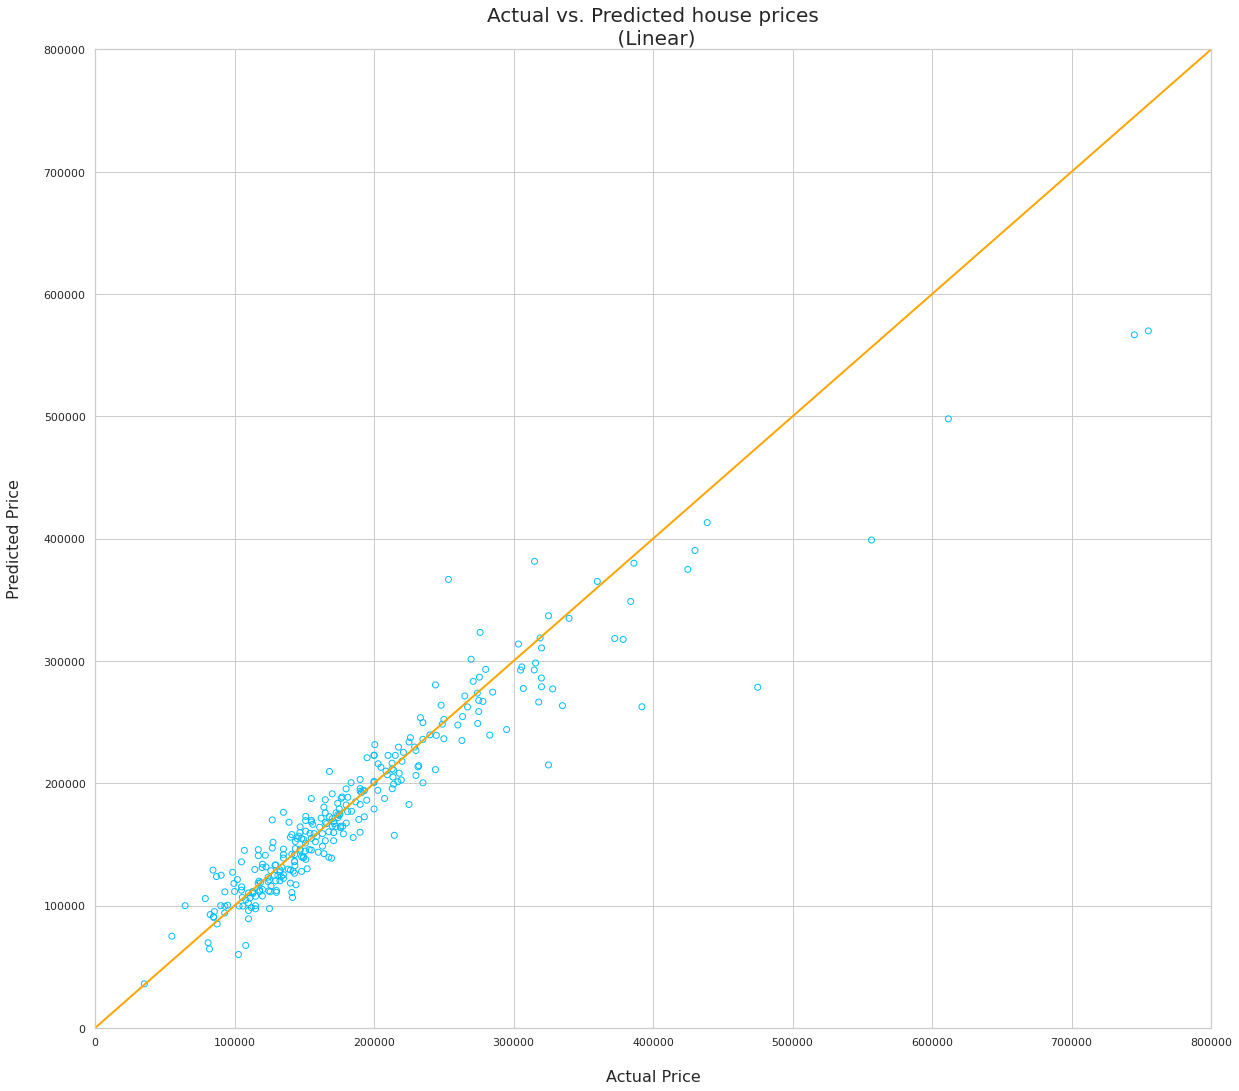

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

Random Forest Regressor

In [ ]:
scores_ran = cross_val_score(model_ran, X_train, y_train,
                            cv=5)

print("Mean scores (Random Forest Model):\n", np.mean(scores_ran))
print("Standard deviation of scores (Random Forest Model):\n", np.std(scores_ran))

Mean scores (Random Forest Model):
 0.8665901880237005
Standard deviation of scores (Random Forest Model):
 0.011396550392859185


In [ ]:
scores_ran_mse = -1 * cross_val_score(model_ran, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Random Forest Model):\n", scores_ran_mse)
print("Mean MSE scores:", scores_ran_mse.mean())

MSE scores (Random Forest Model):
 [0.01693592 0.01730538 0.0251111  0.01903987 0.02321477]
Mean MSE scores: 0.020321409108394306


In [ ]:
model_ran.fit(X_train, y_train)
y_pred_ran = model_ran.predict(X_test)
print_score(y_test, y_pred_ran, "Random Forest")

**** Regressor: Random Forest ****
R²: 0.8738471967209672
RMSE: 0.14988686334783408



In [ ]:
model_list.append(model_ran.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ran), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ran), 4))

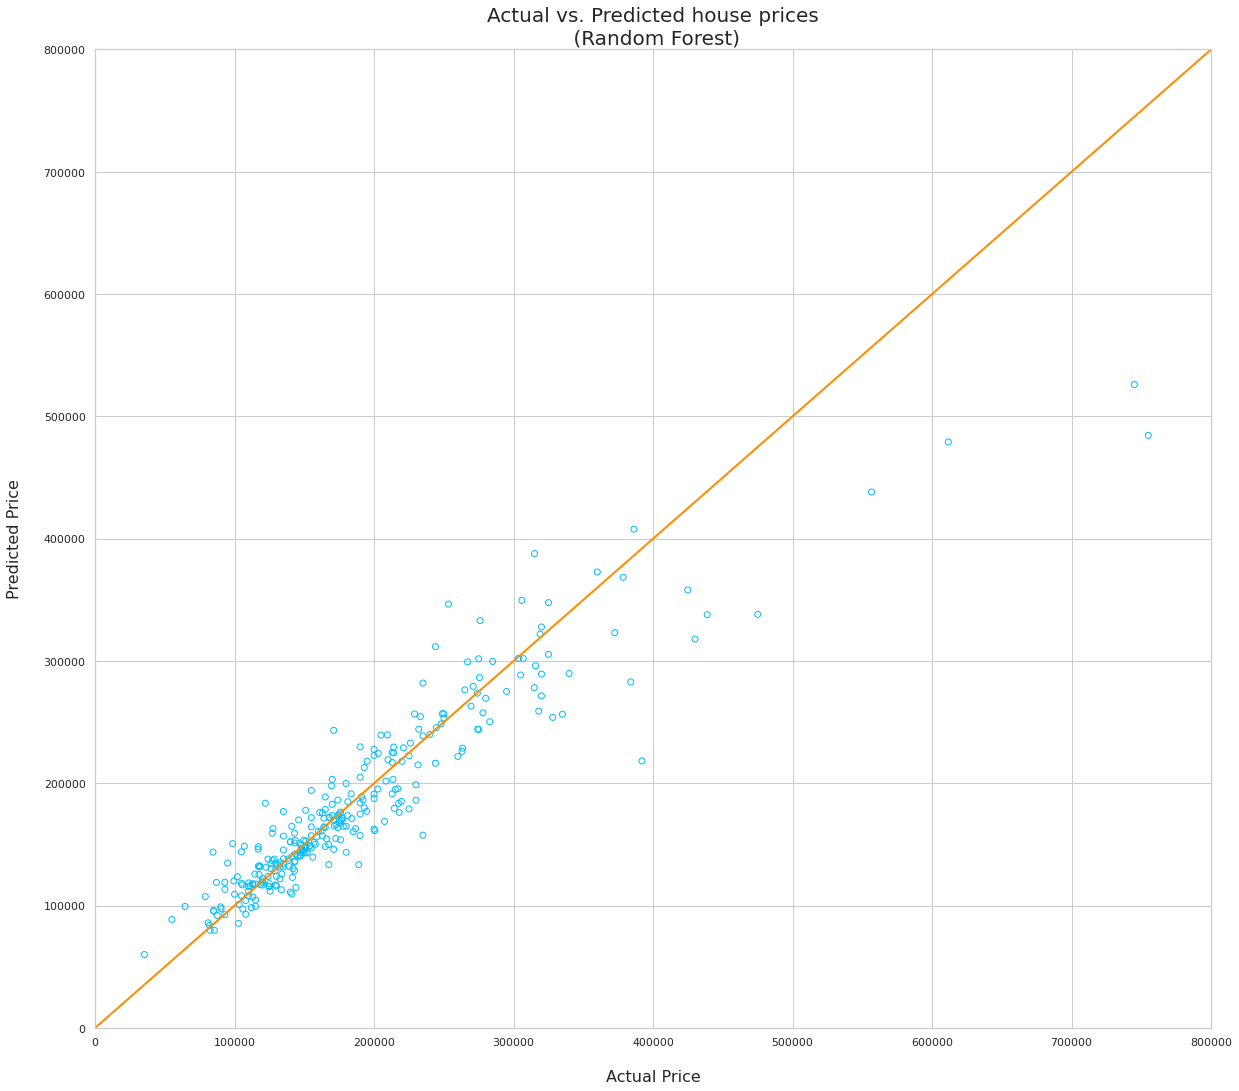

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Random Forest)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ran),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()